### Importing Necessory Libraries

In [241]:
# forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.
# problem_link:https://www.kaggle.com/competitions/copy-of-sw5-mi-e23-bike-sharing

In [242]:
'''Data Fields
----------------------
datetime - date
yr - 0 for 2011, 1 for 2012
month - 1-12
day - 1-31
hour -0-23
season - 1 = spring, 2 = summer, 3 = fall, 4 = winter
holiday - whether the day is considered a holiday
workingday - whether the day is neither a weekend nor holiday
weather -
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
temp - temperature in Celsius
atemp - "feels like" temperature in Celsius
humidity - relative humidity
windspeed - wind speed
count - number of total rentals (Feature to be predicted) '''

'Data Fields\n----------------------\ndatetime - date\nyr - 0 for 2011, 1 for 2012\nmonth - 1-12\nday - 1-31\nhour -0-23\nseason - 1 = spring, 2 = summer, 3 = fall, 4 = winter\nholiday - whether the day is considered a holiday\nworkingday - whether the day is neither a weekend nor holiday\nweather -\n1: Clear, Few clouds, Partly cloudy, Partly cloudy\n2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist\n3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds\n4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog\ntemp - temperature in Celsius\natemp - "feels like" temperature in Celsius\nhumidity - relative humidity\nwindspeed - wind speed\ncount - number of total rentals (Feature to be predicted) '

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
pd.set_option('display.max_columns', None)

## Loading the data

In [245]:
ls

analysis_report_temp.ipynb  data/  EDA.ipynb


In [246]:
df = pd.read_csv("data/Train.csv")

### Proprocessing

In [247]:
# first 5 data
df.head()

Id    datetime  yr  mnth  hr  season  holiday  weekday  workingday  \
0   7057  26/10/2011   0    10  15       4        0        3           1   
1   2659  25/04/2011   0     4  16       2        0        1           1   
2  10749  28/03/2012   1     3  23       2        0        3           1   
3   3765  10/06/2011   0     6  18       2        0        5           1   
4   7579  17/11/2011   0    11   9       4        0        4           1   

   weathersit  temp     atemp       hum  windspeed  count  
0           2  0.52  0.050000  0.053472   0.000000     70  
1           1  0.07  4.524306  0.540000   2.487500    239  
2           1  0.54  3.577778  0.047222   0.932639     93  
3           1  0.08  5.365972  0.590000   1.554861    463  
4           2  0.34  0.210417  0.042361   2.280556    198

In [248]:
df.rename(columns={'hr': 'hour', "weathersit": "weather situation",
          "hum": "humidity", "temp": "temperature in celsius"}, inplace=True)

In [249]:
# total size of the data set
print("Number of Rows in data: ", df.shape[0])
print("Number of columns in data: ", df.shape[1])

Number of Rows in data:  10000
Number of columns in data:  15


In [250]:
# checking basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      10000 non-null  int64  
 1   datetime                10000 non-null  object 
 2   yr                      10000 non-null  int64  
 3   mnth                    10000 non-null  int64  
 4   hour                    10000 non-null  int64  
 5   season                  10000 non-null  int64  
 6   holiday                 10000 non-null  int64  
 7   weekday                 10000 non-null  int64  
 8   workingday              10000 non-null  int64  
 9   weather situation       10000 non-null  int64  
 10  temperature in celsius  10000 non-null  float64
 11  atemp                   10000 non-null  float64
 12  humidity                10000 non-null  float64
 13  windspeed               10000 non-null  float64
 14  count                   10000 non-null 

In [251]:
# Checking for null values
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

In [252]:
# checking statistical properties of numerical data
df.describe().T

count         mean          std   min          25%  \
Id                      10000.0  8709.440100  5010.264485  1.00  4398.500000   
yr                      10000.0     0.504400     0.500006  0.00     0.000000   
mnth                    10000.0     6.542500     3.441450  1.00     4.000000   
hour                    10000.0    11.550500     6.885273  0.00     6.000000   
season                  10000.0     2.499500     1.108387  1.00     2.000000   
holiday                 10000.0     0.027000     0.162091  0.00     0.000000   
weekday                 10000.0     3.016300     2.004055  0.00     1.000000   
workingday              10000.0     0.686000     0.464140  0.00     0.000000   
weather situation       10000.0     1.429500     0.646739  1.00     1.000000   
temperature in celsius  10000.0     0.215323     0.188643  0.01     0.050000   
atemp                   10000.0     2.980542     1.462444  0.05     1.893750   
humidity                10000.0     0.230856     0.225367  0.00     0.052778   
windspeed               10000.0     1.204607     0.923099  0.00     0.622222   
count                   10000.0   190.008900   182.379156  1.00    40.000000   

                                50%           75%           max  
Id                      8724.500000  13044.250000  17379.000000  
yr                         1.000000      1.000000      1.000000  
mnth                       7.000000     10.000000     12.000000  
hour                      12.000000     18.000000     23.000000  
season                     3.000000      3.000000      4.000000  
holiday                    0.000000      0.000000      1.000000  
weekday                    3.000000      5.000000      6.000000  
workingday                 1.000000      1.000000      1.000000  
weather situation          1.000000      2.000000      4.000000  
temperature in celsius     0.080000      0.380000      1.000000  
atemp                      3.156250      4.209028      6.838889  
humidity                   0.064583      0.440000      1.000000  
windspeed                  1.140278      1.761806      5.907639  
count                    143.500000    280.000000    977.000000

### Treating datetime column

In [253]:
df["datetime"] = pd.to_datetime(df["datetime"], format='%d/%m/%Y')

In [254]:
# Converting datetime column to year,month,day
df['year'] = pd.DatetimeIndex(df["datetime"]).year
df['month'] = pd.DatetimeIndex(df["datetime"]).month
df['day'] = pd.DatetimeIndex(df["datetime"]).day

In [255]:
df.head()

Id   datetime  yr  mnth  hour  season  holiday  weekday  workingday  \
0   7057 2011-10-26   0    10    15       4        0        3           1   
1   2659 2011-04-25   0     4    16       2        0        1           1   
2  10749 2012-03-28   1     3    23       2        0        3           1   
3   3765 2011-06-10   0     6    18       2        0        5           1   
4   7579 2011-11-17   0    11     9       4        0        4           1   

   weather situation  temperature in celsius     atemp  humidity  windspeed  \
0                  2                    0.52  0.050000  0.053472   0.000000   
1                  1                    0.07  4.524306  0.540000   2.487500   
2                  1                    0.54  3.577778  0.047222   0.932639   
3                  1                    0.08  5.365972  0.590000   1.554861   
4                  2                    0.34  0.210417  0.042361   2.280556   

   count  year  month  day  
0     70  2011     10   26  
1    239  2011      4   25  
2     93  2012      3   28  
3    463  2011      6   10  
4    198  2011     11   17

In [256]:
# droping some column which are duplicate or unnecessary
df.drop(["mnth", "yr", "Id"], axis=1, inplace=True)

In [257]:
# creating a copy to manipulate for eda
df_eda = df.copy()

In [258]:
# Mapping day number to specif days
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday',
        3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_eda['weekday'] = df_eda['weekday'].map(days)

In [259]:
df_eda.head()

datetime  hour  season  holiday   weekday  workingday  weather situation  \
0 2011-10-26    15       4        0  Thursday           1                  2   
1 2011-04-25    16       2        0   Tuesday           1                  1   
2 2012-03-28    23       2        0  Thursday           1                  1   
3 2011-06-10    18       2        0  Saturday           1                  1   
4 2011-11-17     9       4        0    Friday           1                  2   

   temperature in celsius     atemp  humidity  windspeed  count  year  month  \
0                    0.52  0.050000  0.053472   0.000000     70  2011     10   
1                    0.07  4.524306  0.540000   2.487500    239  2011      4   
2                    0.54  3.577778  0.047222   0.932639     93  2012      3   
3                    0.08  5.365972  0.590000   1.554861    463  2011      6   
4                    0.34  0.210417  0.042361   2.280556    198  2011     11   

   day  
0   26  
1   25  
2   28  
3   10  
4   17

In [260]:
# mapping season for eda
season_map = {1: "spring", 2: "summer", 3: "fall", 4: "winter"}
df_eda["season"] = df_eda["season"].map(season_map)

In [261]:
df_eda.head()

datetime  hour  season  holiday   weekday  workingday  weather situation  \
0 2011-10-26    15  winter        0  Thursday           1                  2   
1 2011-04-25    16  summer        0   Tuesday           1                  1   
2 2012-03-28    23  summer        0  Thursday           1                  1   
3 2011-06-10    18  summer        0  Saturday           1                  1   
4 2011-11-17     9  winter        0    Friday           1                  2   

   temperature in celsius     atemp  humidity  windspeed  count  year  month  \
0                    0.52  0.050000  0.053472   0.000000     70  2011     10   
1                    0.07  4.524306  0.540000   2.487500    239  2011      4   
2                    0.54  3.577778  0.047222   0.932639     93  2012      3   
3                    0.08  5.365972  0.590000   1.554861    463  2011      6   
4                    0.34  0.210417  0.042361   2.280556    198  2011     11   

   day  
0   26  
1   25  
2   28  
3   10  
4   17

### Seperating 2011 and 2012 data 

In [262]:
# creating seperate dataset for 2011 and 2012
df_2011 = df_eda[df_eda["year"] == 2011]
df_2012 = df_eda[df_eda["year"] == 2012]

In [263]:
df_2011.shape

(4956, 15)

In [264]:
df_2011.sample(5)

datetime  hour  season  holiday  weekday  workingday  \
4233 2011-01-30     5  spring        0   Monday           0   
2754 2011-06-04     6  summer        0   Sunday           0   
6580 2011-02-21    12  spring        1  Tuesday           0   
9277 2011-02-27    17  spring        0   Monday           0   
3327 2011-07-23    17    fall        0   Sunday           0   

      weather situation  temperature in celsius     atemp  humidity  \
4233                  1                0.140000  1.472917  0.059722   
2754                  1                0.540000  3.577778  0.060000   
6580                  2                0.320000  2.209722  0.045833   
9277                  1                0.420000  2.945833  0.540000   
3327                  1                0.065278  6.102778  0.380000   

      windspeed  count  year  month  day  
4233   0.000000      3  2011      1   30  
2754   0.000000     28  2011      6    4  
6580   0.134722     93  2011      2   21  
9277   0.134722    187  2011      2   27  
3327   0.932639    197  2011      7   23

In [265]:
df_2012.shape

(5044, 15)

In [266]:
df_2012.sample(5)

datetime  hour  season  holiday    weekday  workingday  \
6008 2012-09-17    16    fall        0    Tuesday           1   
4828 2012-07-16     7    fall        0    Tuesday           1   
6654 2012-01-18    19  spring        0   Thursday           1   
9876 2012-11-13    13  winter        0  Wednesday           1   
3632 2012-04-25     7  summer        0   Thursday           1   

      weather situation  temperature in celsius     atemp  humidity  \
6008                  2                0.044444  4.209028  0.047917   
4828                  1                0.050000  4.734722  0.070000   
6654                  1                0.220000  0.136806  0.370000   
9876                  1                0.340000  2.209722  0.530000   
3632                  1                0.340000  2.525000  0.049306   

      windspeed  count  year  month  day  
6008   1.761806    453  2012      9   17  
4828   0.622222    483  2012      7   16  
6654   2.695139    256  2012      1   18  
9876   1.761806    218  2012     11   13  
3632   0.000000    389  2012      4   25

# EDA

## Uni Variate Analysis

In [267]:
# Finding variables with unique counts < input
def find_unique(df, count=1):
    cols = df.columns
    unique_var_list = []
    for col in cols:
        if df[col].nunique() <= count and col != "count":
            unique_var_list.append(col)
    return unique_var_list

In [268]:
unique_var_list = find_unique(df_eda, 12)

In [269]:
len(unique_var_list)

7

In [270]:
for col_name in df_eda.columns:
    if col_name in unique_var_list:
        print(
            f"variable Name {col_name} ....... unique value count: {df_eda[col_name].nunique()}")

variable Name season ....... unique value count: 4
variable Name holiday ....... unique value count: 2
variable Name weekday ....... unique value count: 7
variable Name workingday ....... unique value count: 2
variable Name weather situation ....... unique value count: 4
variable Name year ....... unique value count: 2
variable Name month ....... unique value count: 12


In [271]:
# getting other columns which are not included in above analysis which has unique count > 12 ie: Continues variables
non_unique_variables = []
for col_name in df_eda.columns:
    if col_name not in unique_var_list and col_name != "count":
        non_unique_variables.append(col_name)
        print(
            f"variable Name {col_name} ....... unique value count: {df_eda[col_name].nunique()}")

variable Name datetime ....... unique value count: 730
variable Name hour ....... unique value count: 24
variable Name temperature in celsius ....... unique value count: 45
variable Name atemp ....... unique value count: 63
variable Name humidity ....... unique value count: 86
variable Name windspeed ....... unique value count: 28
variable Name day ....... unique value count: 31


### Analysing categerical Variables vs Rental Count


In [272]:
def plot_cat_vs_continues_bar_plot(data, unique_var_list, target="", title=""):
    for col in unique_var_list:
        plt.figure(figsize=(20, 10))
        plt.title(f"{col} vs {title}", fontsize=30)
        filtered_data = (data.groupby(col)[target].sum())
        p1 = filtered_data.plot(kind="bar")
        for p in p1.containers:
            p1.bar_label(p, fmt='{:.0f}', label_type='edge', fontsize=20)
        plt.yticks(fontsize=15, rotation=45)
        plt.xticks(fontsize=15, rotation=45)
        plt.xlabel(col, fontsize=20)  # Adjust the fontsize as needed
        plt.ylabel(target, fontsize=20)  # Adjust the fontsize as needed
        plt.show()

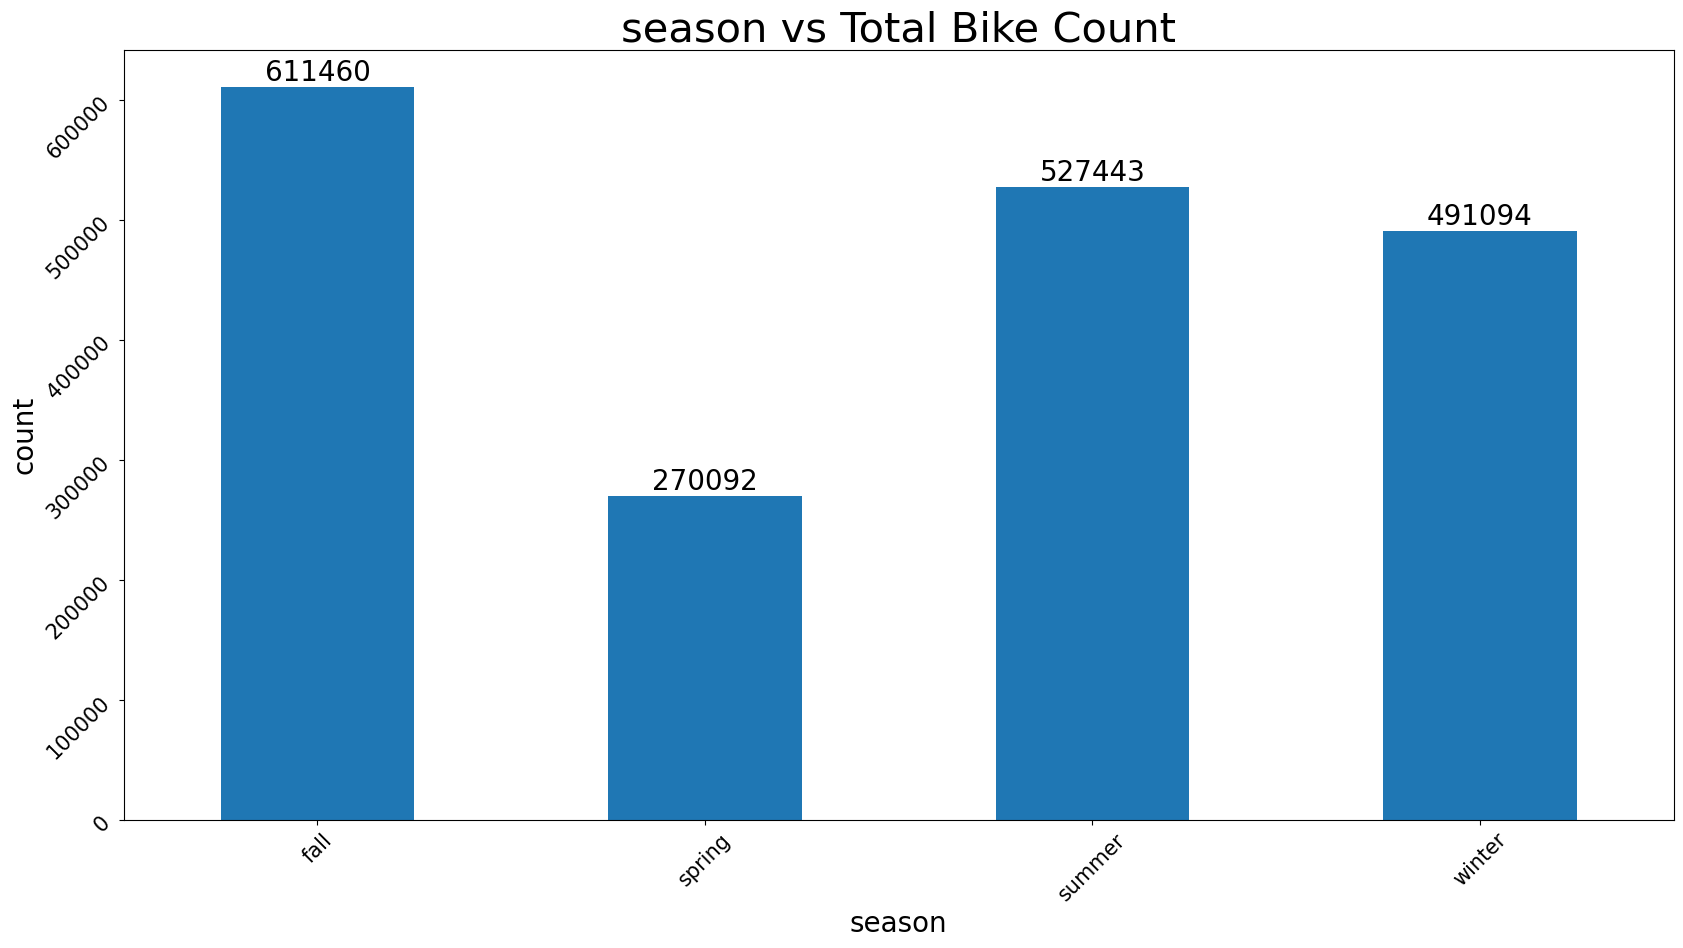

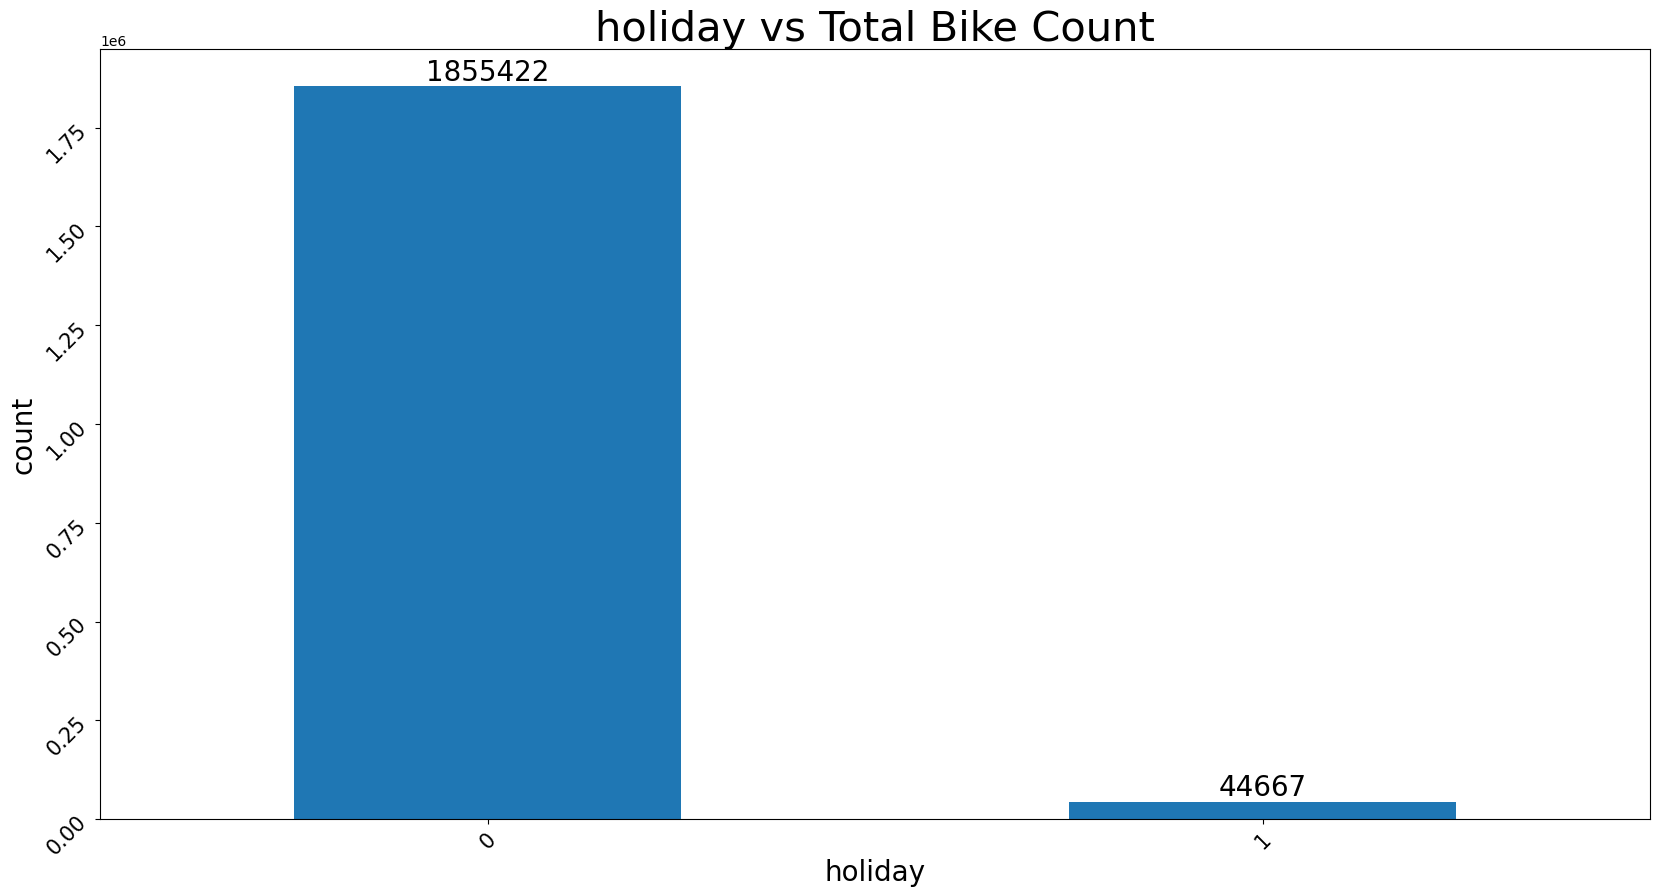

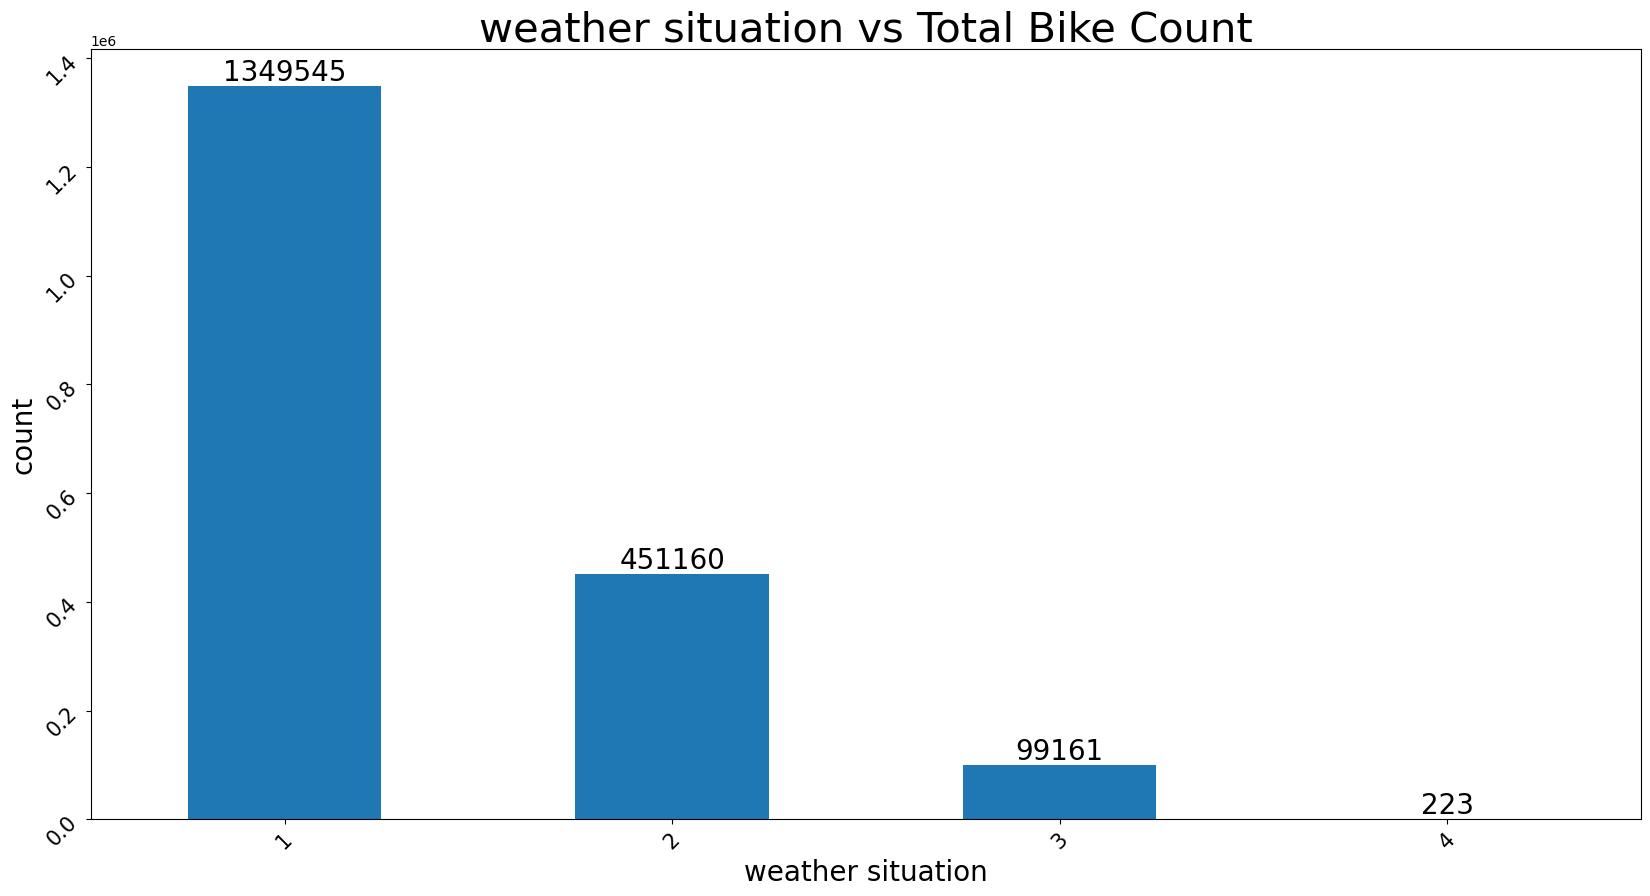

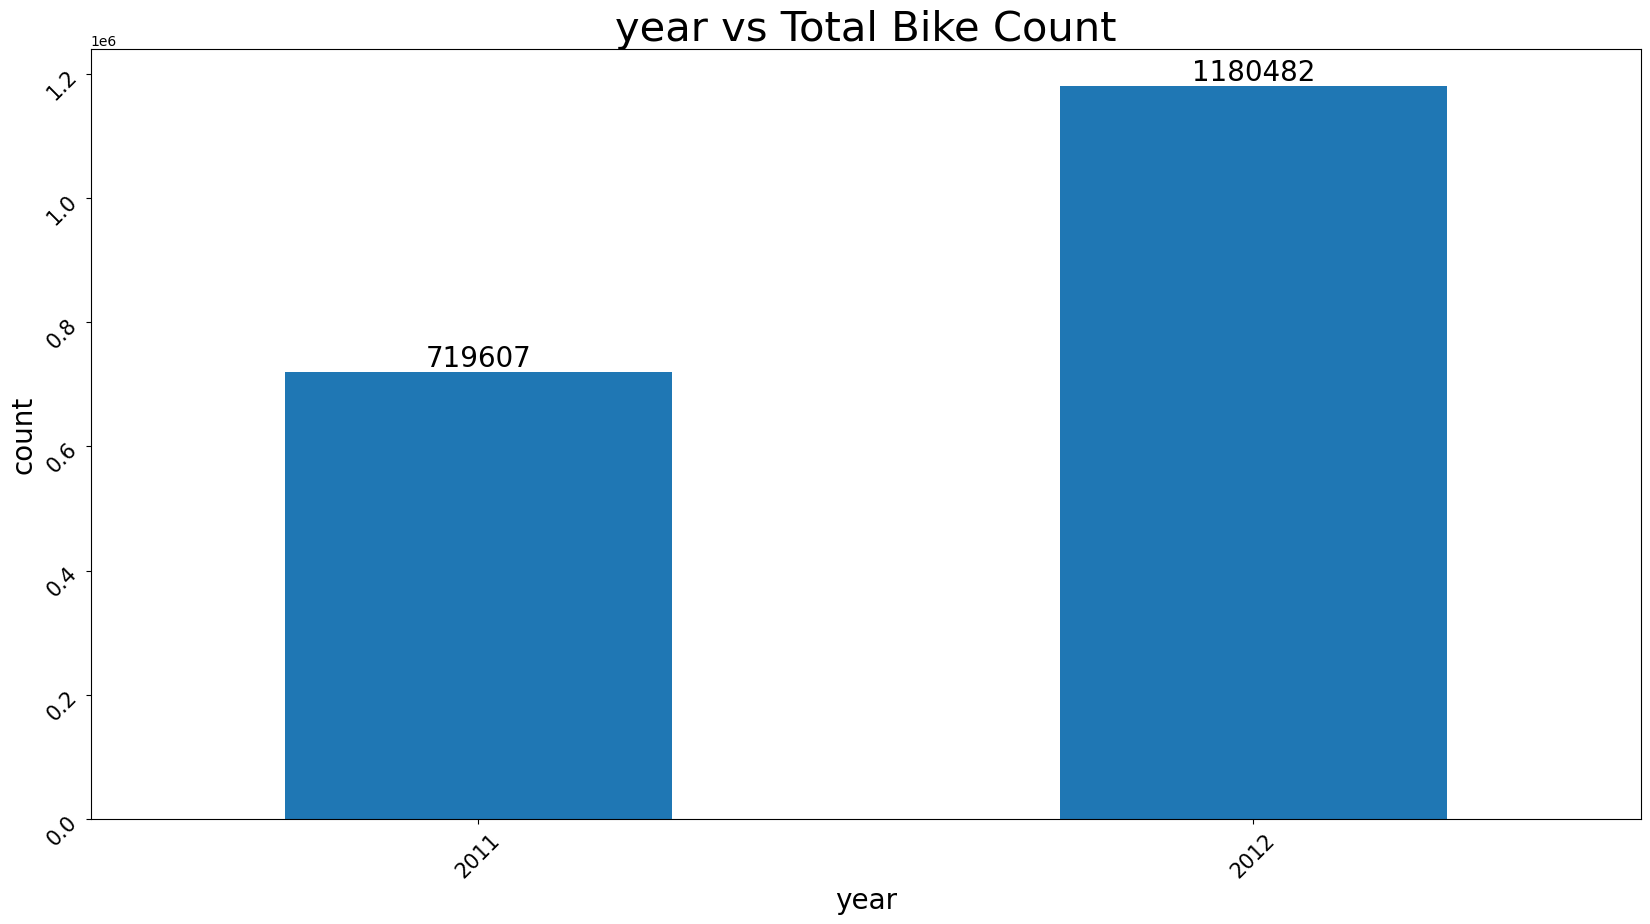

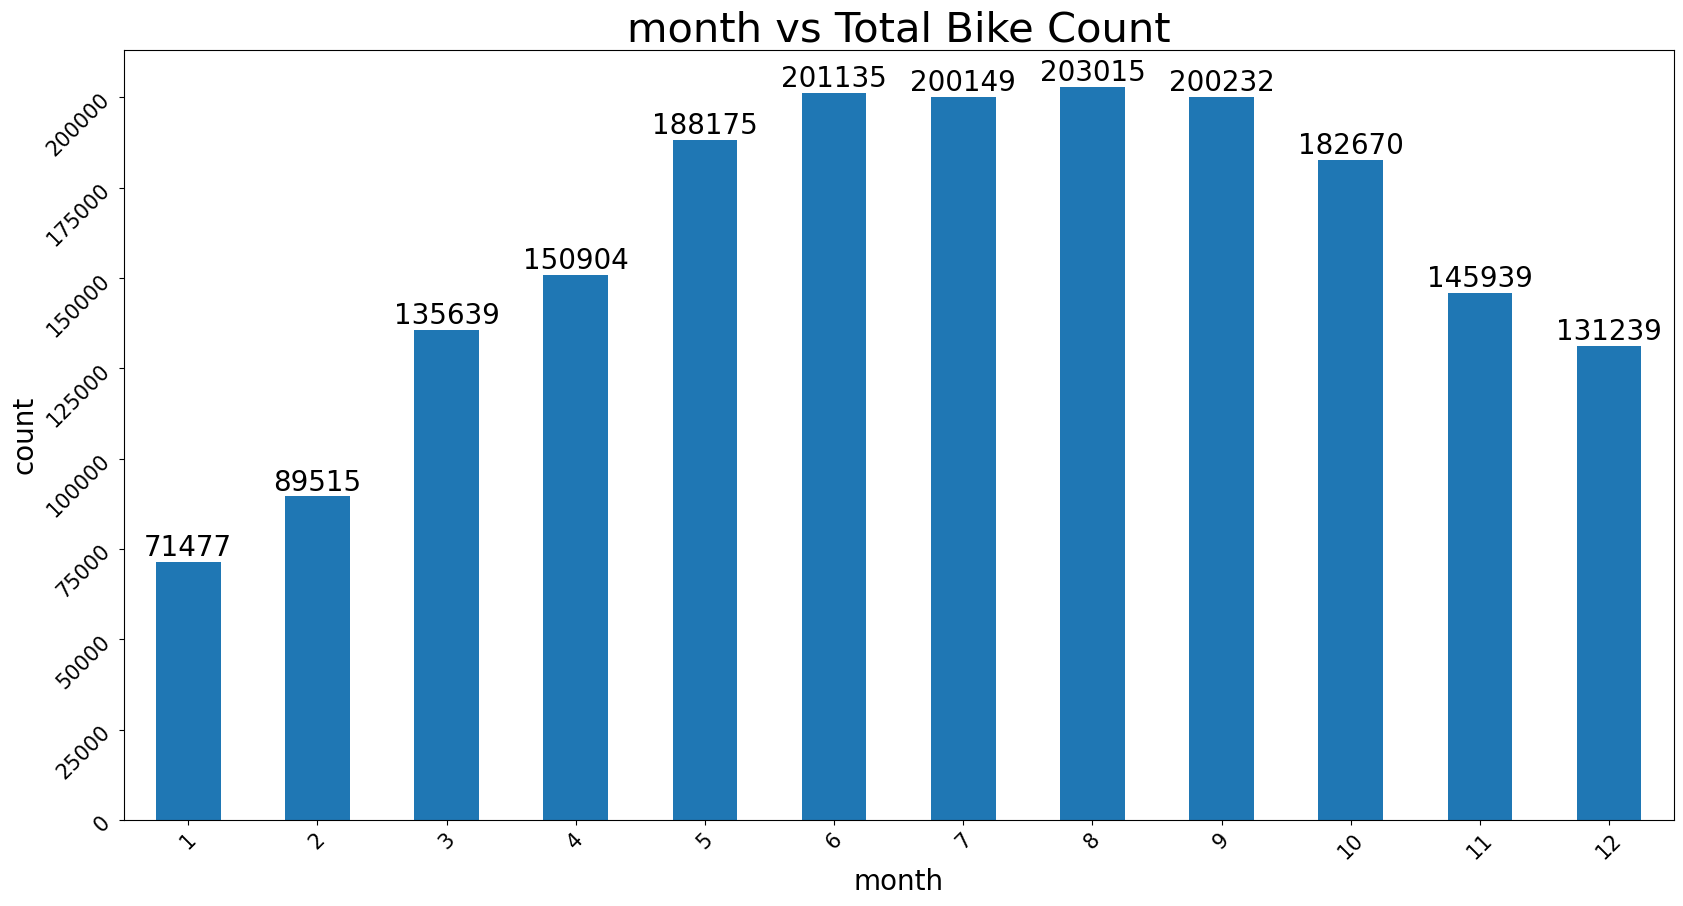

In [273]:
plot_cat_vs_continues_bar_plot(
    df_eda, unique_var_list, "count", "Total Bike Count")

In [274]:
def plot_cat_vs_continues_bar_plot_with_hue(data, unique_var_list, additional_group_by_col="", target="", title="",):
    for col in unique_var_list:
        if col != additional_group_by_col:
            plt.figure(figsize=(20, 10))
            plt.title(f"{col}  {title}", fontsize=30)
            df_filtered = data.groupby([col, additional_group_by_col])[
                target].sum().reset_index()
            p1 = sns.barplot(x=col, y=target, data=df_filtered,
                             hue=additional_group_by_col)
            for p in p1.containers:
                p1.bar_label(p, fmt='{:.0f}', label_type='edge', fontsize=10)
            plt.yticks(fontsize=15, rotation=45)
            plt.xticks(fontsize=15, rotation=45)
            plt.xlabel(col, fontsize=20)  # Adjust the fontsize as needed
            plt.ylabel(target, fontsize=20)  # Adjust the fontsize as needed
            plt.legend(fontsize=20)
            plt.show()

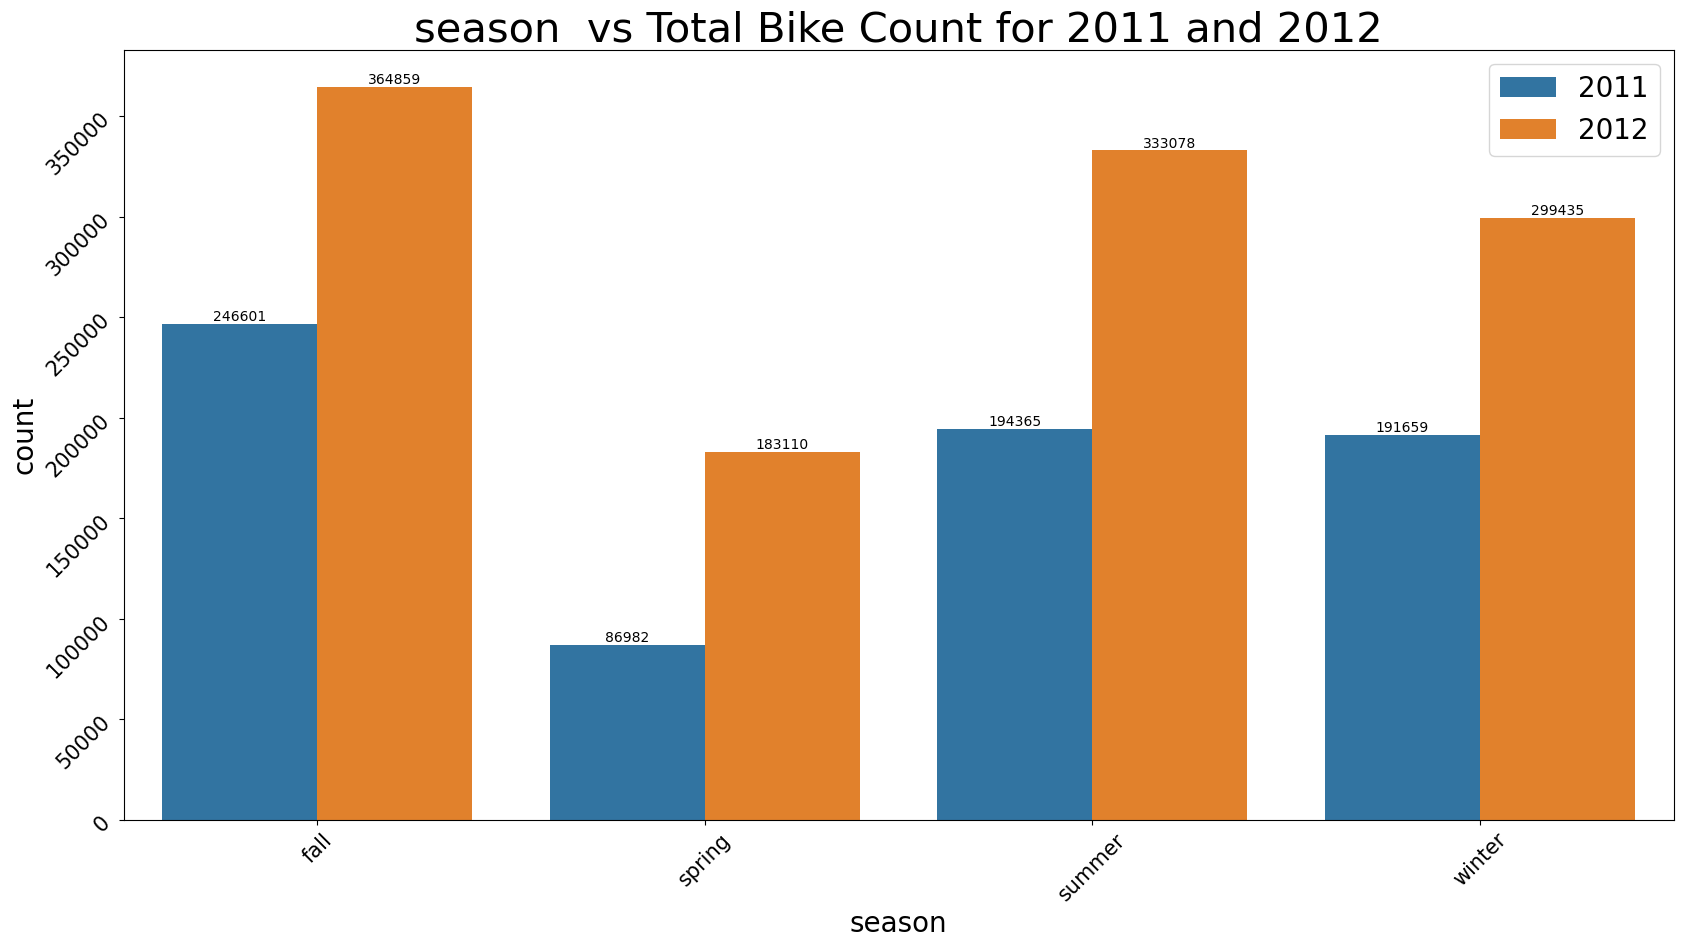

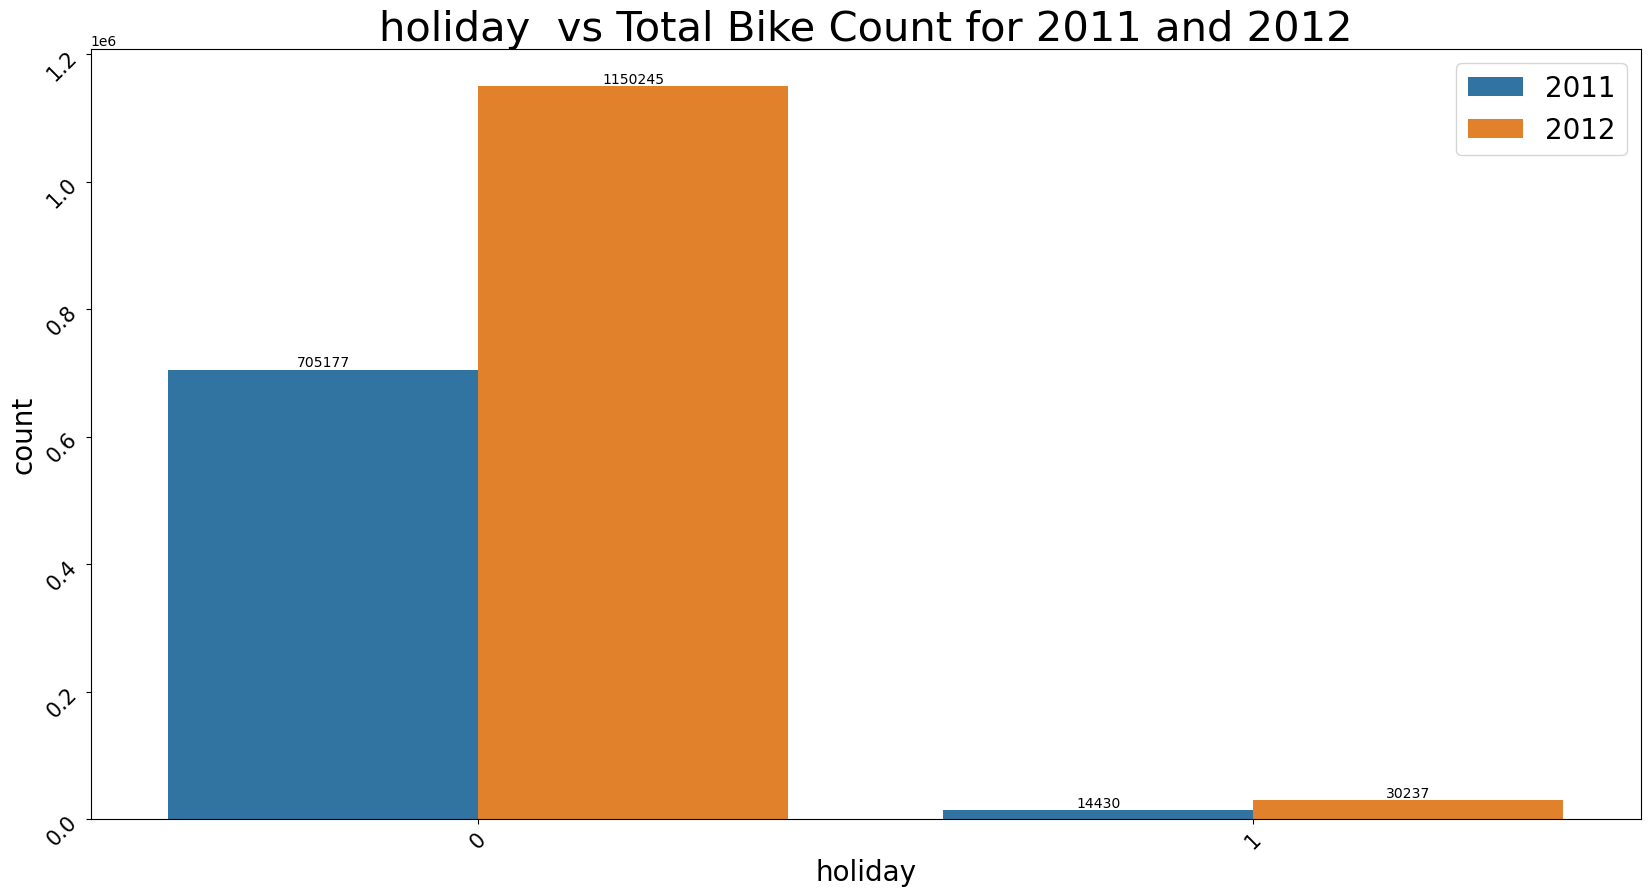

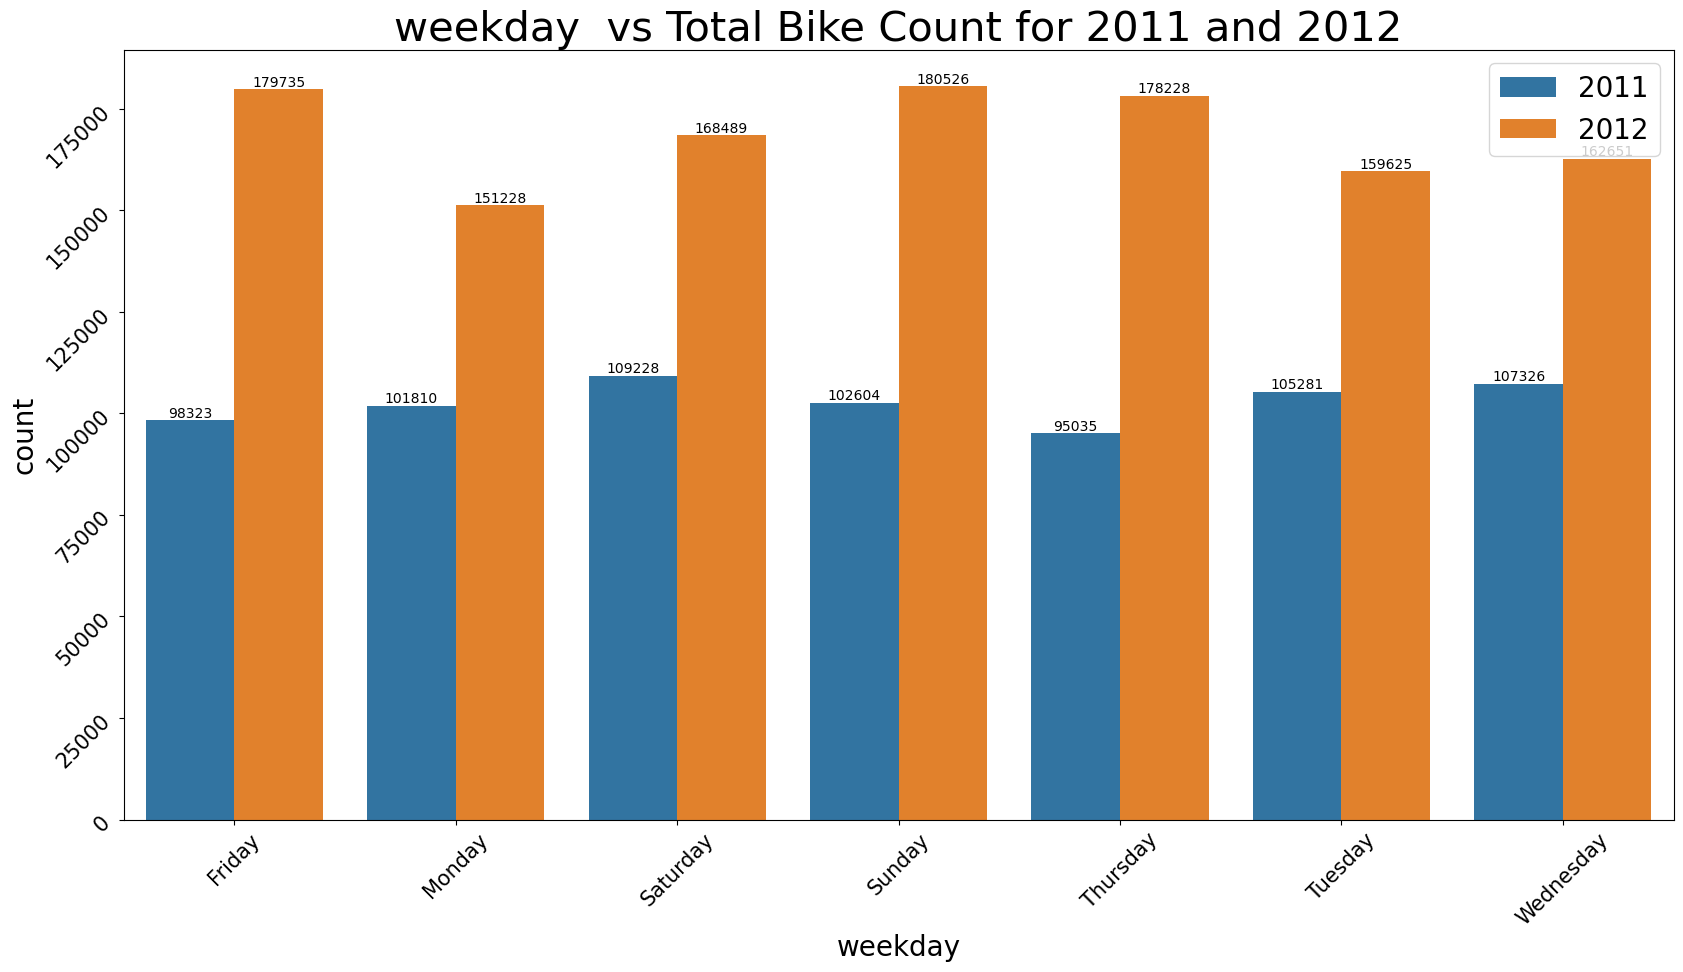

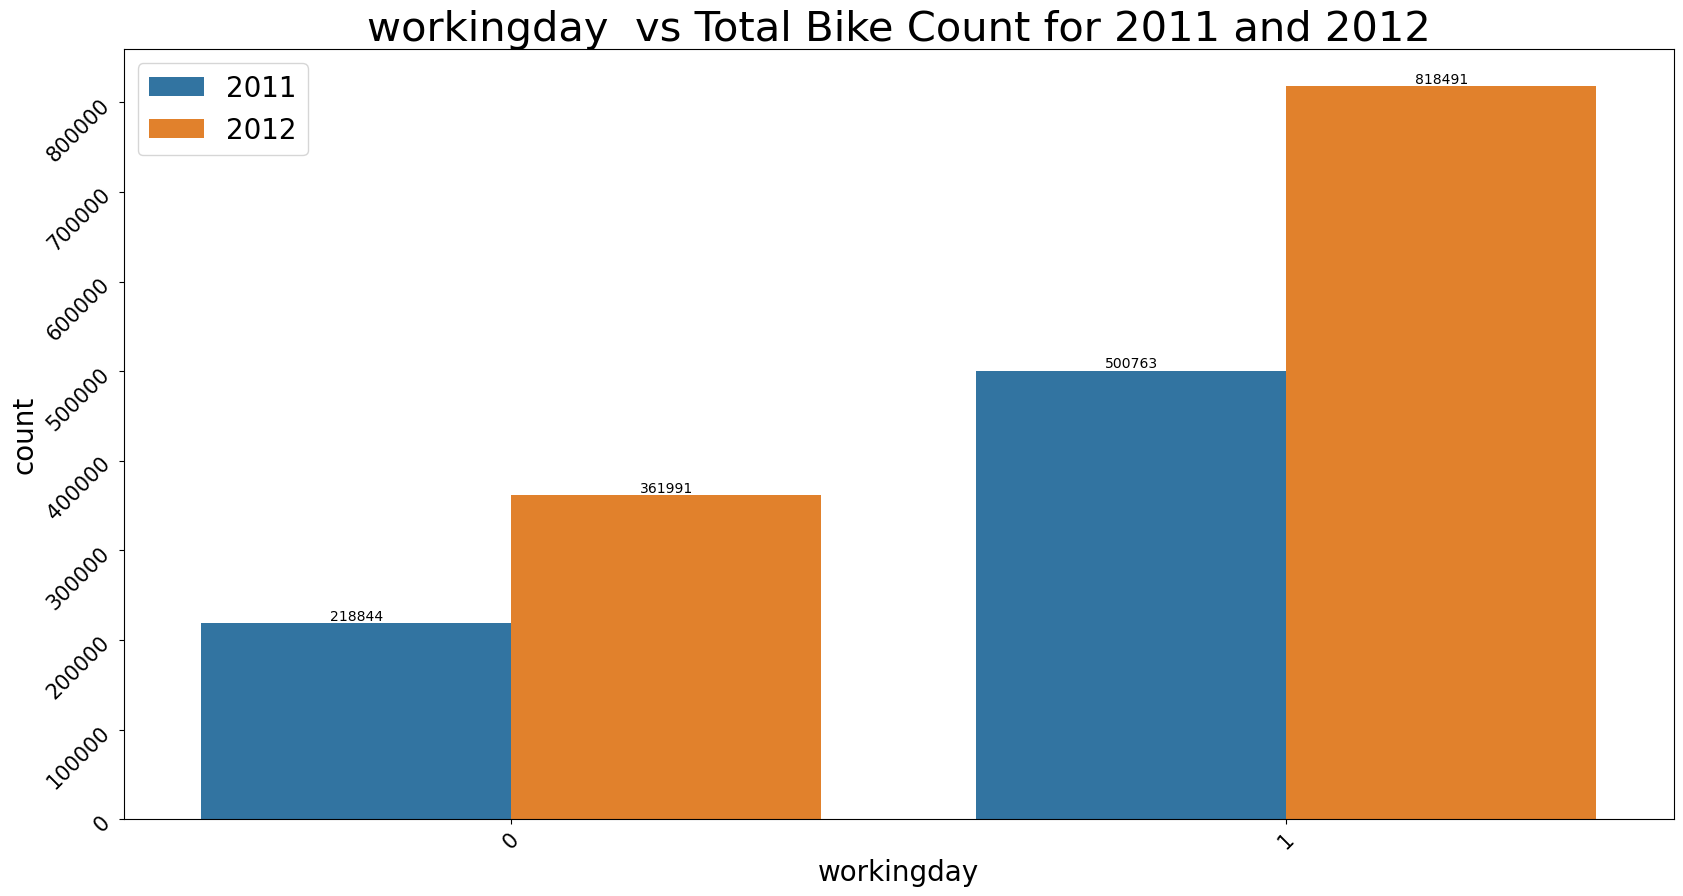

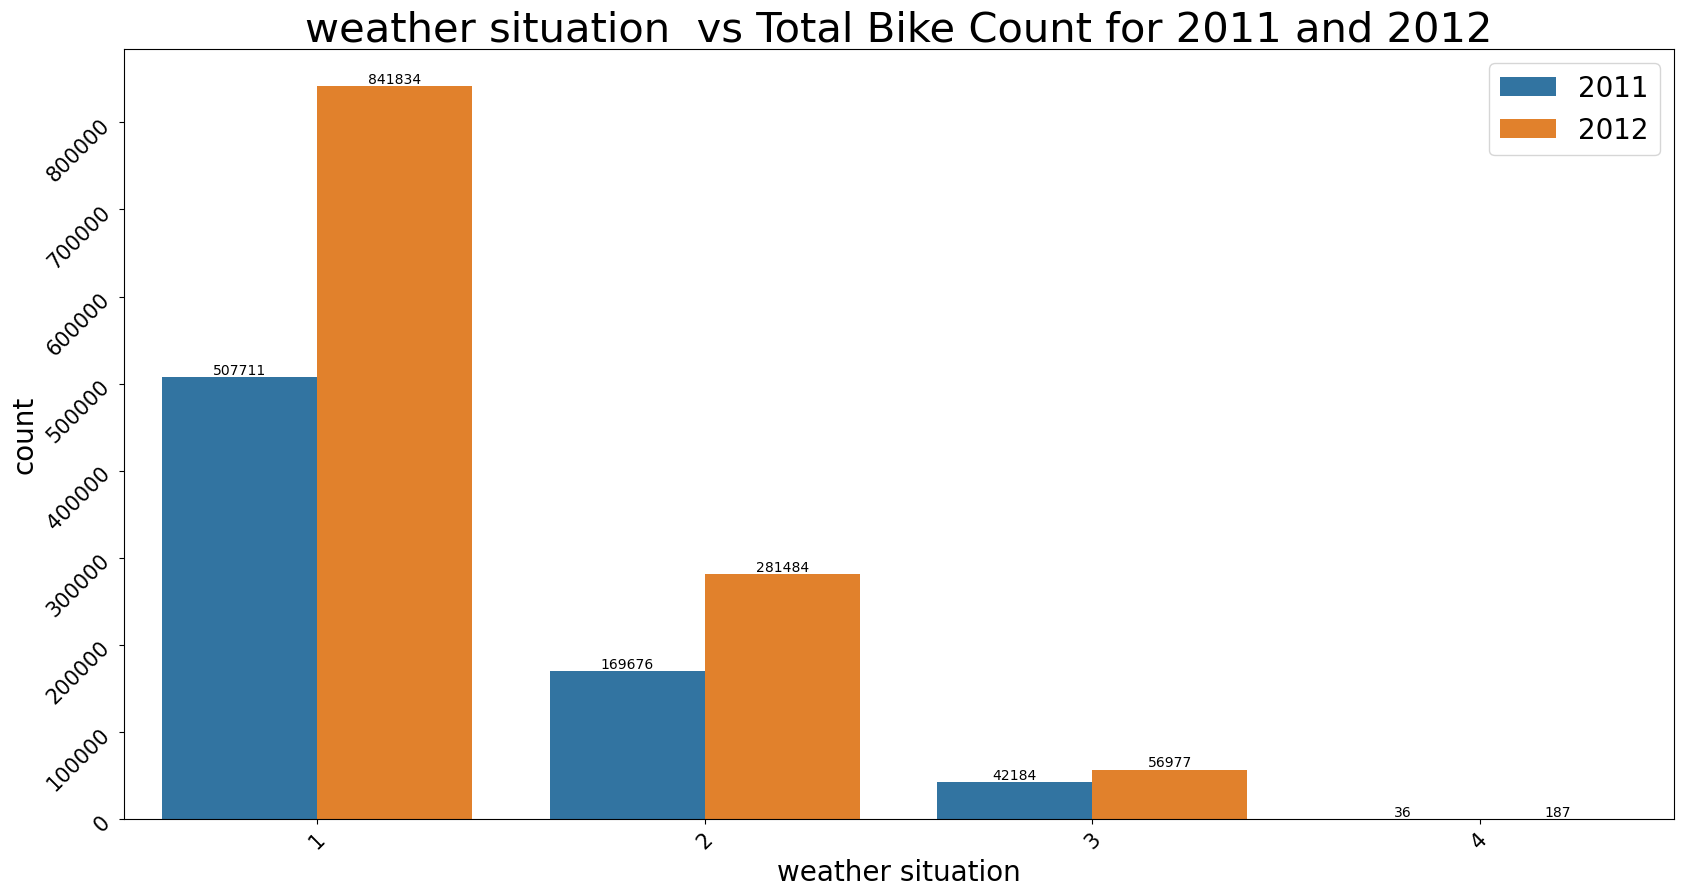

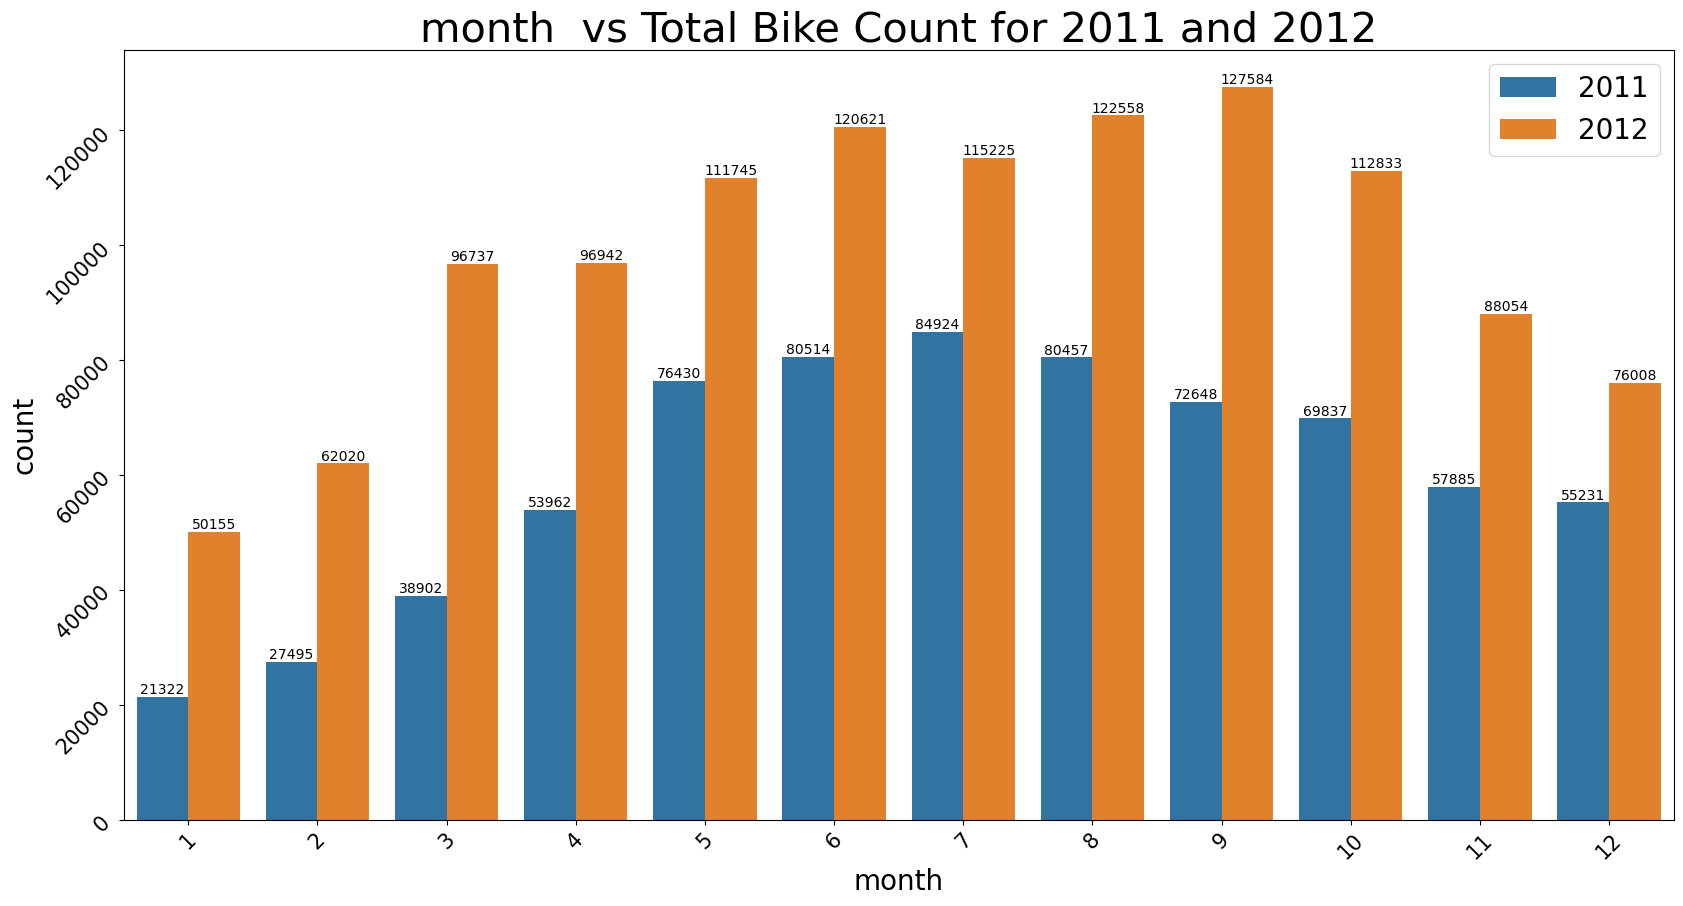

In [275]:
plot_cat_vs_continues_bar_plot_with_hue(
    df_eda, unique_var_list, "year", "count", "vs Total Bike Count for 2011 and 2012")

* Working day has more rentals and mid year (may - Nov) has an increase in rental rate. Initial months and final months have less rentals.
* In year 2011 7th month(july) had more rental. In 2012 Sep has more rentals
* working days have more rentals as compared to non working days(may be because we have 5 days work week and 2 holiday)

In [276]:
# trying to find mean of non working day - 0th index give non working day data and dividing by 2(Assuming 5 days work and 2 days holiday leave work culture)
value = df_eda.groupby(["workingday"])["count"].sum()[0]/2
print("Mean for non working day (By assuming 5 day work 2 day leave work culture): ", value)

Mean for non working day (By assuming 5 day work 2 day leave work culture):  290417.5


In [277]:

value = (df_eda.groupby(["workingday"])["count"].sum()[1])/5
print("Mean for working day (By assuming 5 day work 2 day leave work culture): ", value)

Mean for working day (By assuming 5 day work 2 day leave work culture):  263850.8


In [278]:
value = df_eda.groupby(["workingday", "year"])["count"].sum()[0]/2
print("mean count of rental for holidays by years: ")
value.reset_index()

mean count of rental for holidays by years: 


year     count
0  2011  109422.0
1  2012  180995.5

In [279]:
value = df_eda.groupby(["workingday", "year"])["count"].sum()[1]/5
print("mean count of rantals for working days by years: ")
value.reset_index()

mean count of rantals for working days by years: 


year     count
0  2011  100152.6
1  2012  163698.2

In these we can see that holidays has more mean rental count

### Analyzing Continues variables vs rental Count

In [280]:
def line_plot_continues_vs_target_all_data(data, var_list, title="", target=""):
    for col in var_list:
        if col != target:
            plt.figure(figsize=(20, 10))
            plt.title(f"{col} {title}", fontsize=25)
            data_total = (data.groupby(col)[target].sum())

            plt.plot(data_total.index, data_total.values, color='red',
                     linestyle='solid', linewidth=2, label="total data")
            plt.legend(bbox_to_anchor=(1.05, 1.0),
                       loc='upper left', fontsize=20)
            plt.xlabel(col, fontsize=20)
            plt.ylabel(target, fontsize=20)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.grid()
            plt.show()

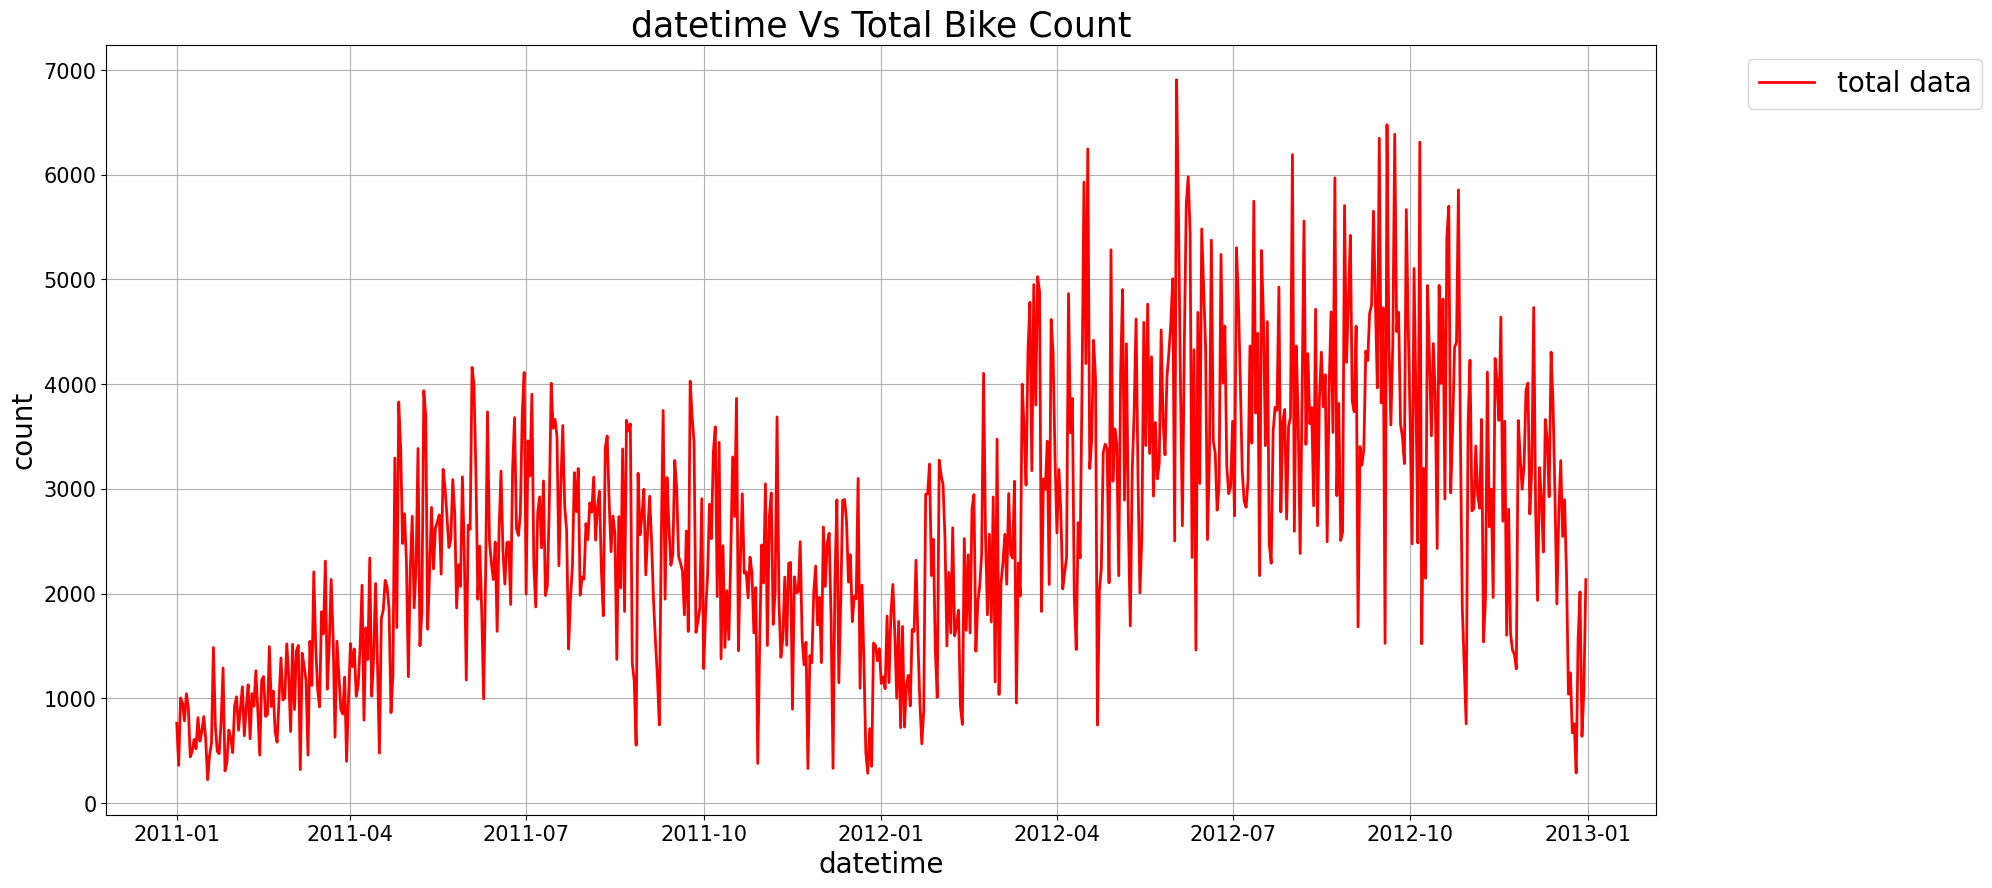

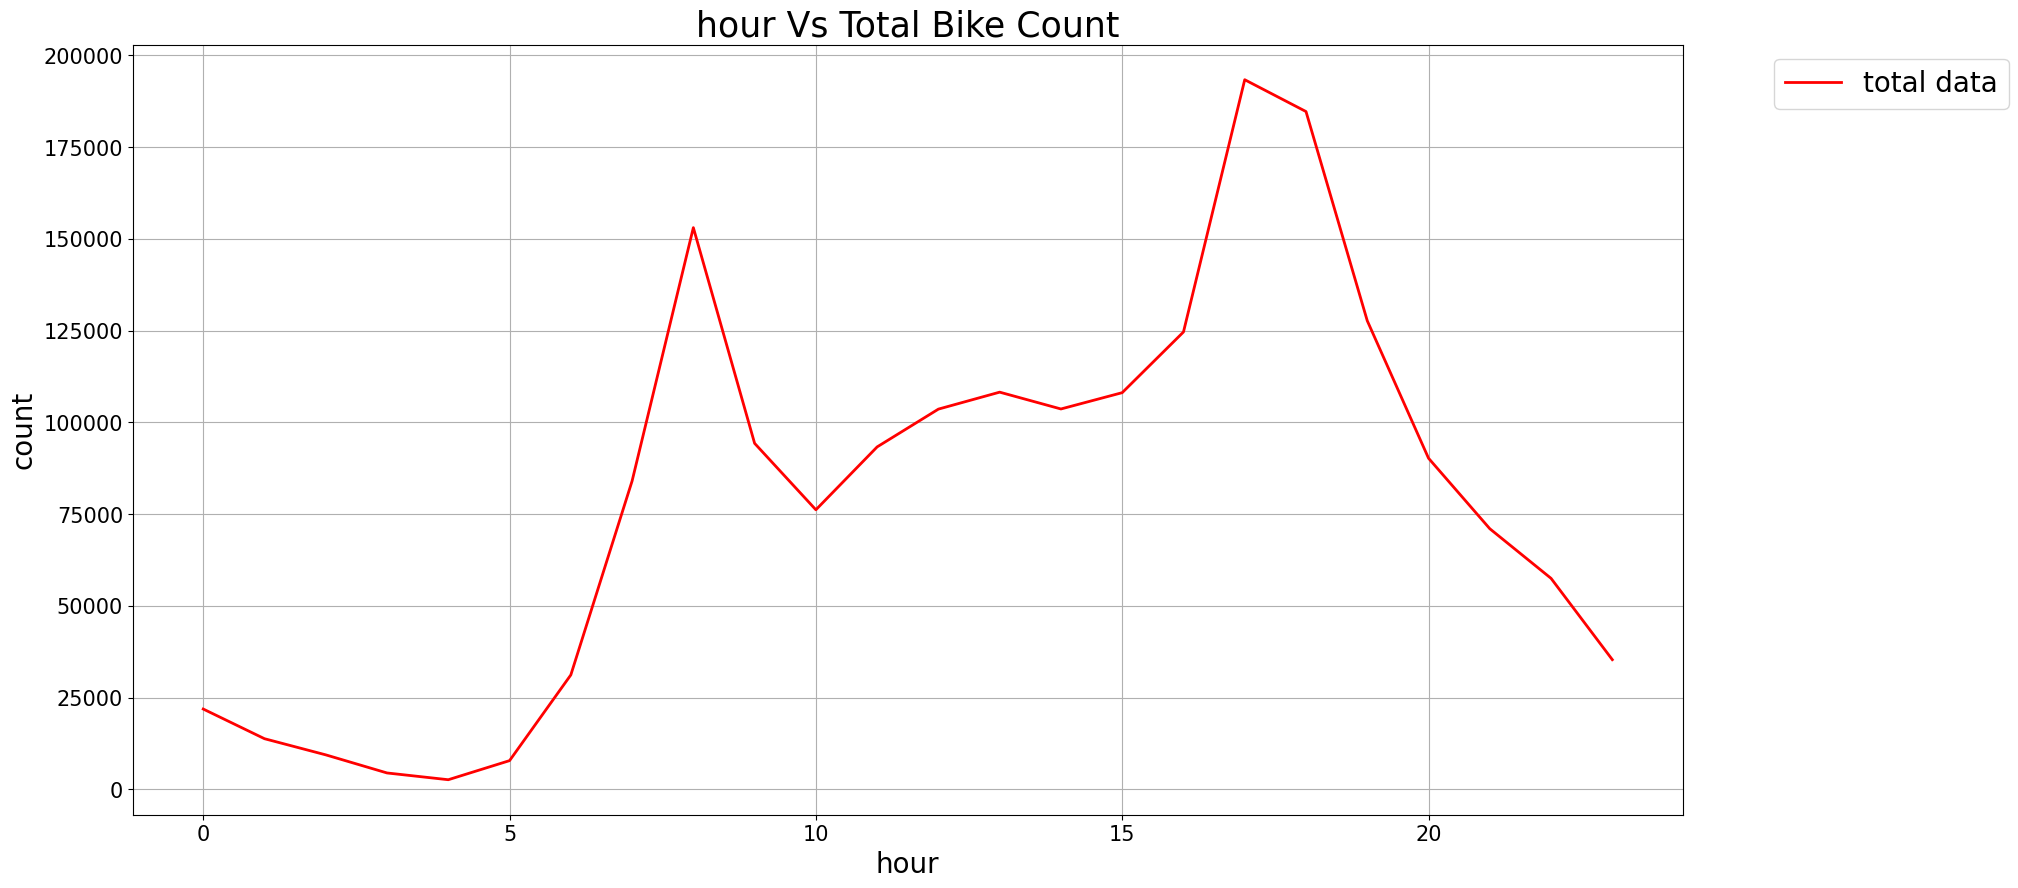

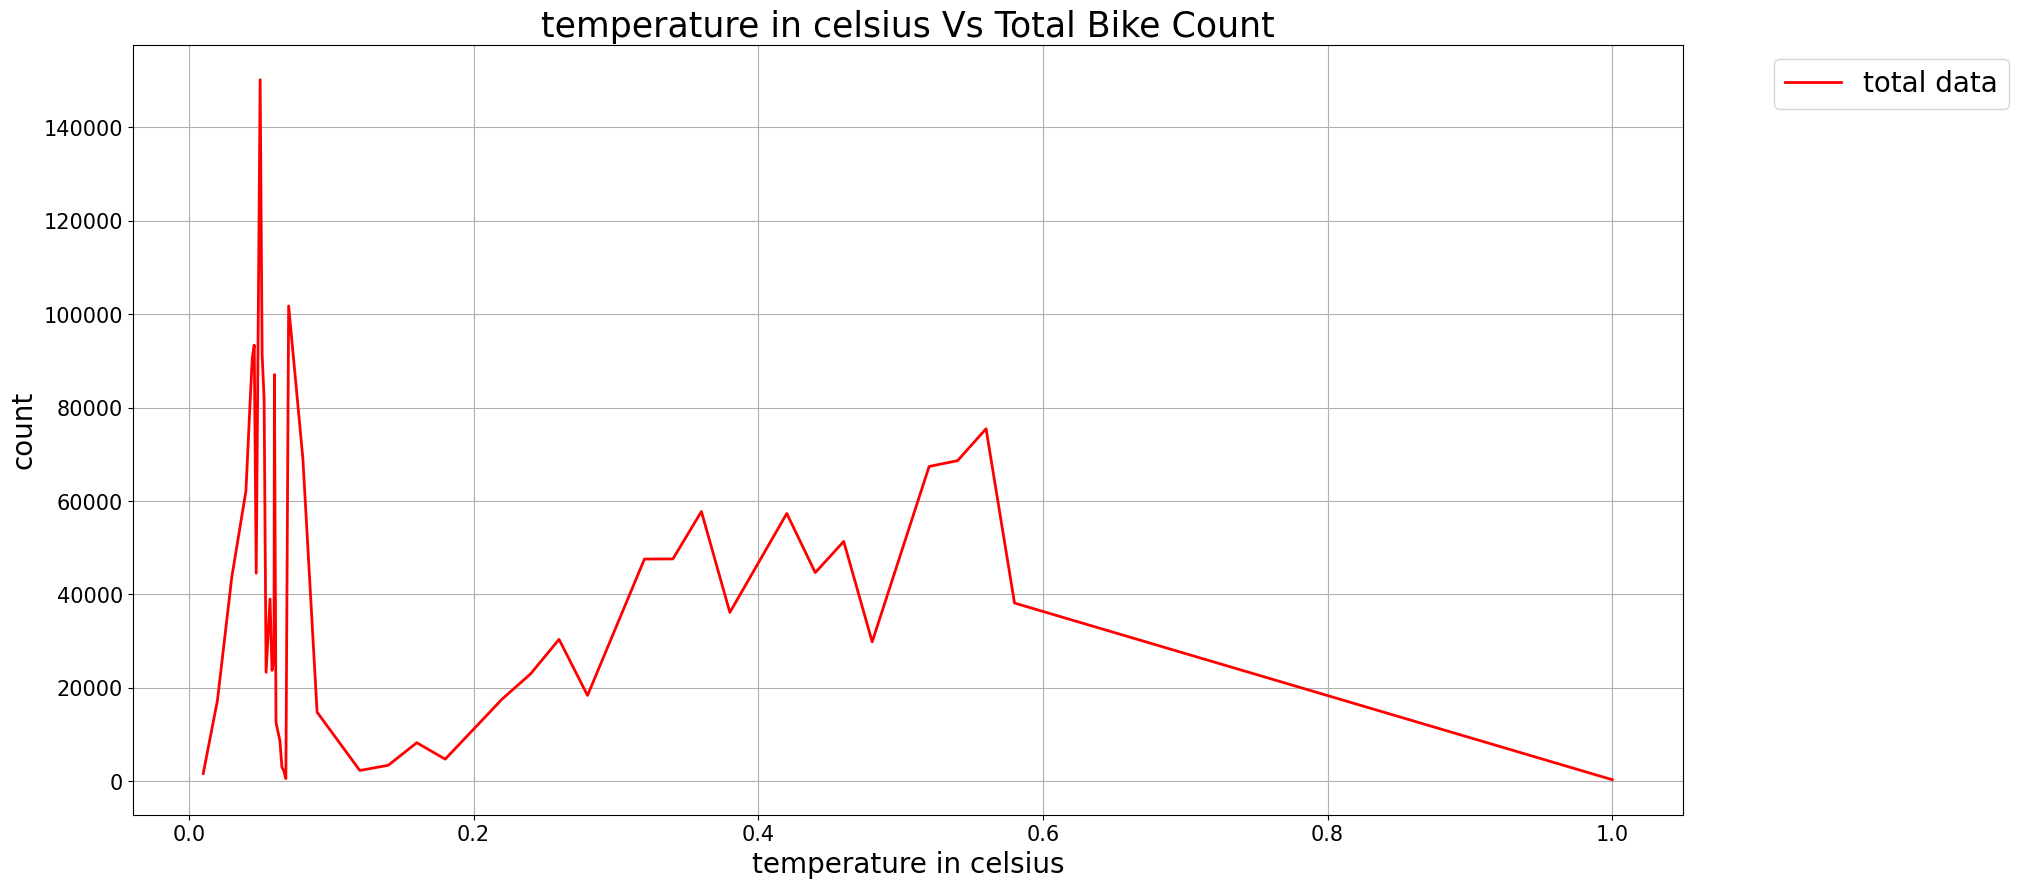

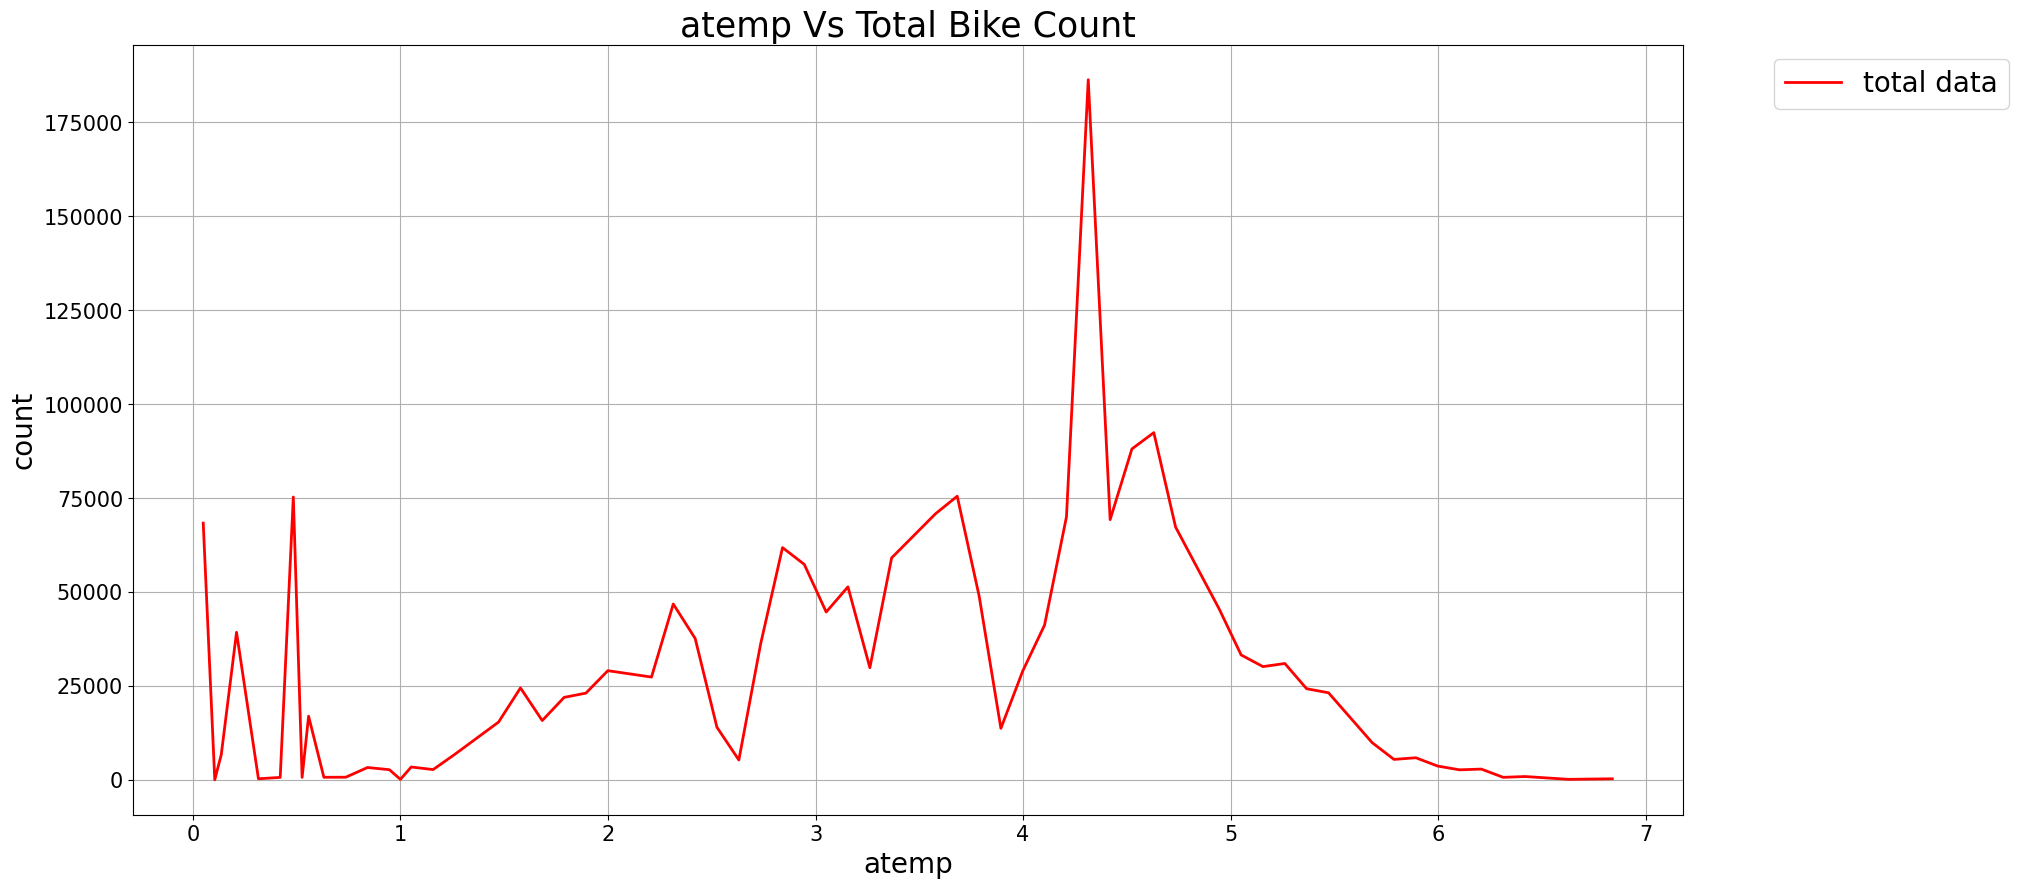

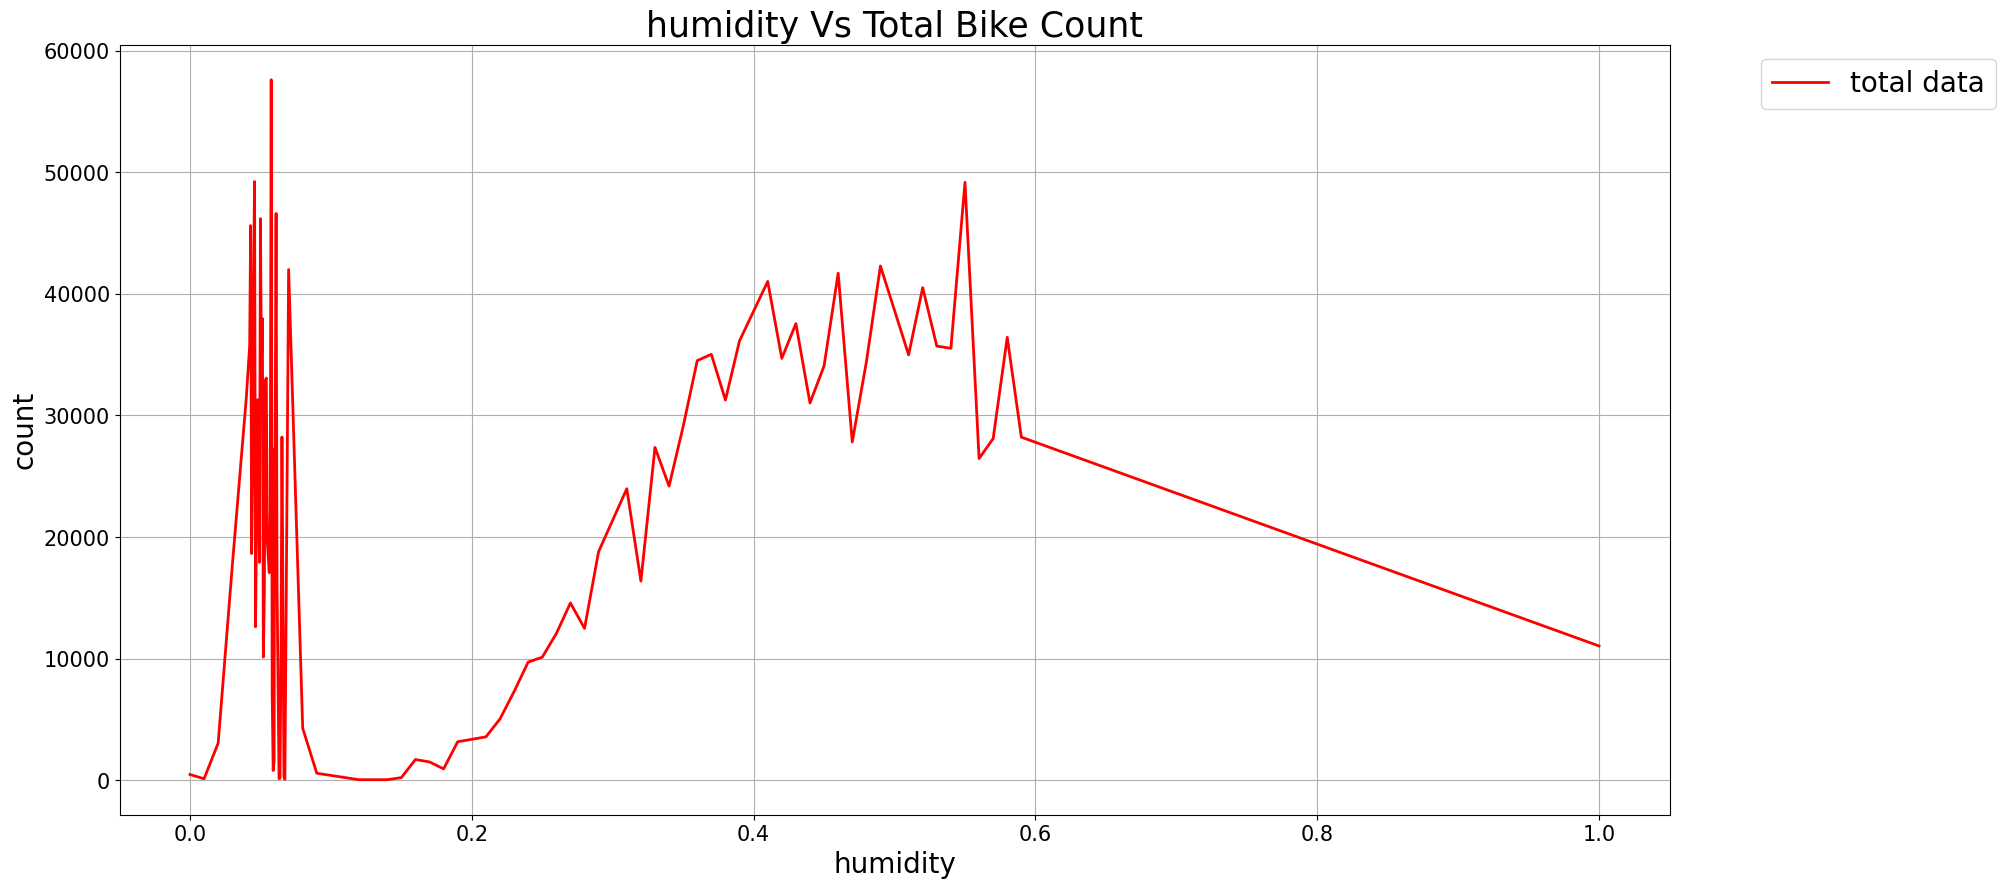

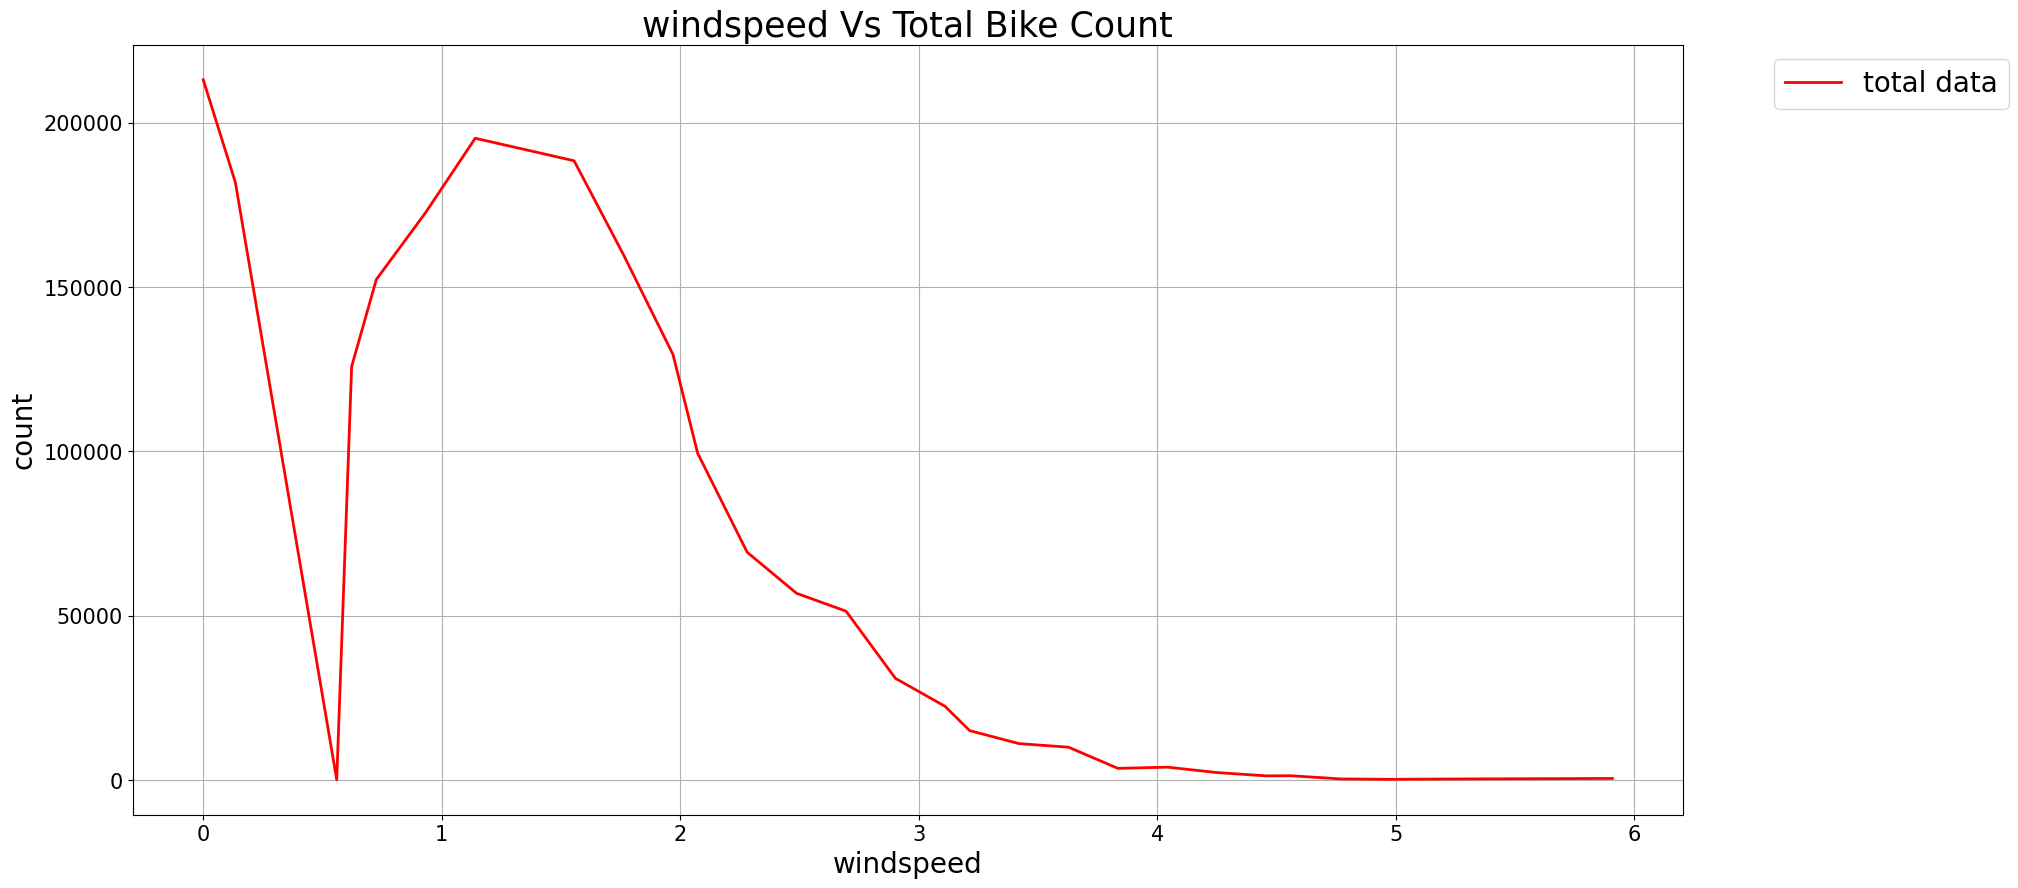

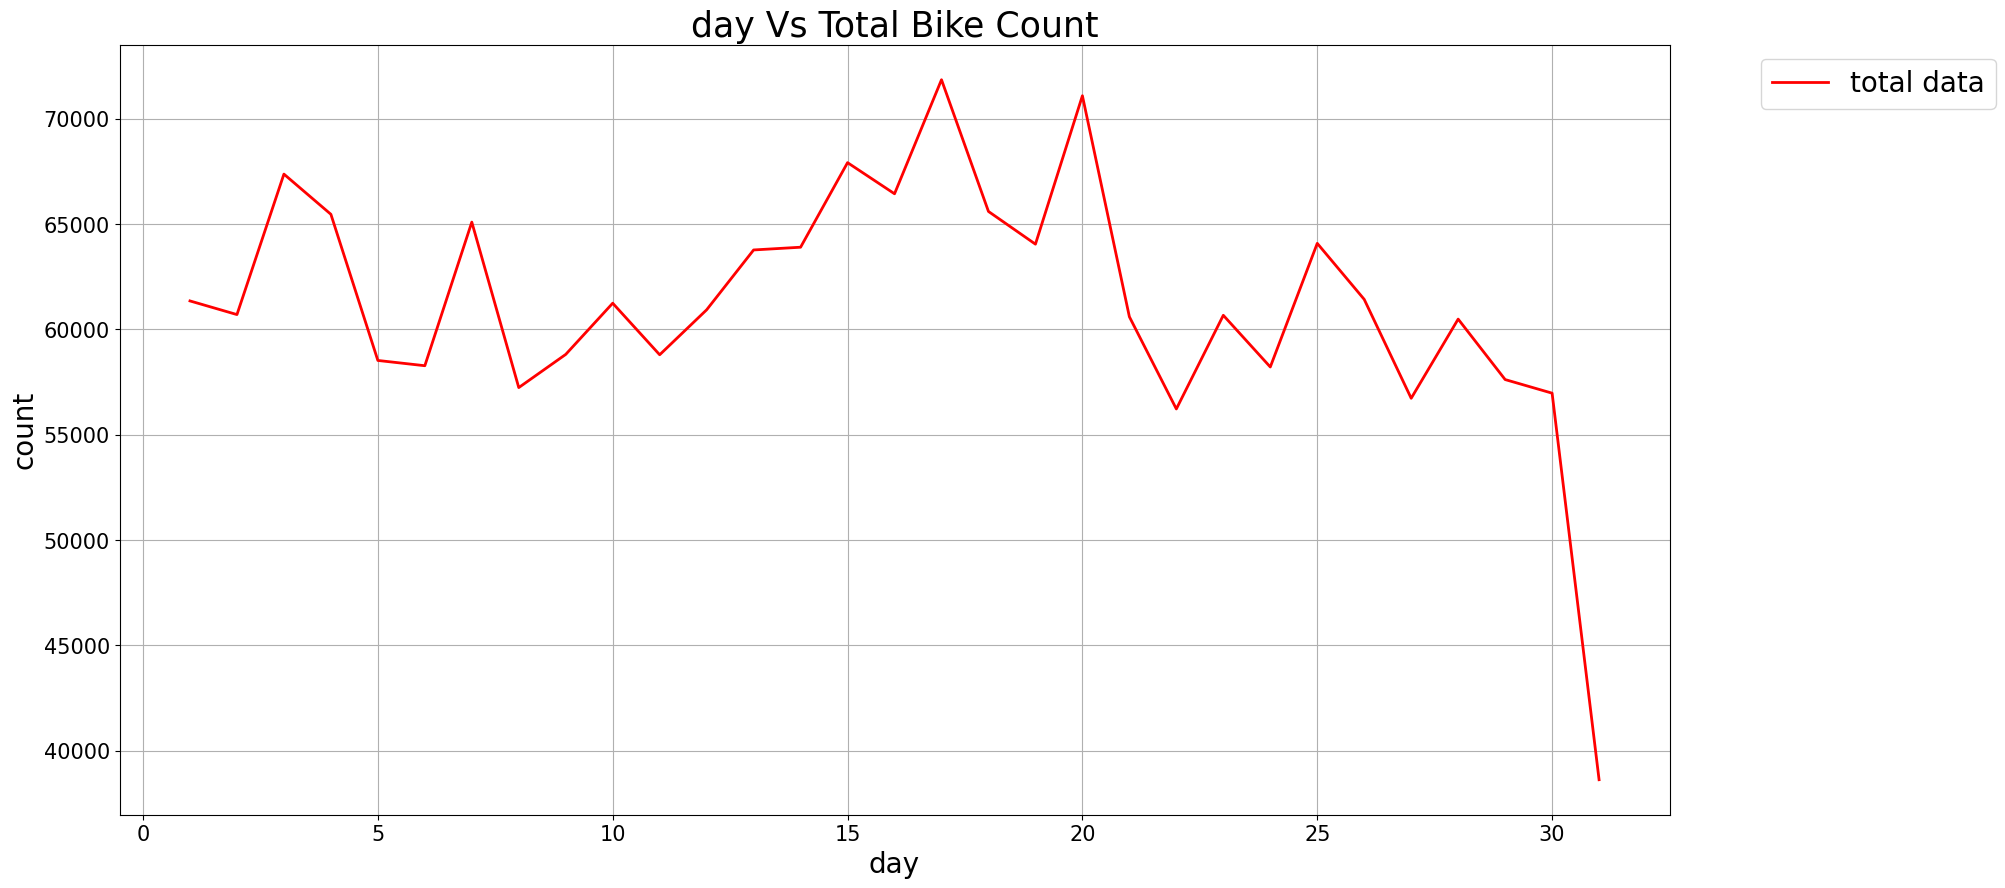

In [281]:
line_plot_continues_vs_target_all_data(
    df_eda, non_unique_variables, "Vs Total Bike Count", "count")

** There is a steep decrease in end of the month. We can check this for 2011 and 2012 data seperately

In [282]:
# finding day with maximum rental count
df_eda[df_eda['count'] == df_eda['count'].max()]

datetime  hour season  holiday   weekday  workingday  \
3849 2012-09-12    18   fall        0  Thursday           1   

      weather situation  temperature in celsius     atemp  humidity  \
3849                  1                0.045833  4.313889      0.44   

      windspeed  count  year  month  day  
3849   1.761806    977  2012      9   12

In [283]:
# finding day with minimum rental count
min_rental_count_df = df_eda[df_eda['count'] == df_eda['count'].min()]

In [284]:
min_rental_count_df["hour"].unique()

array([3, 4, 2, 6, 5, 1, 7])

In [285]:
min_rental_count_df["season"].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [286]:
def line_plot_continues_vs_target_for_two_dataframe(var_list, df1, df2, target="", label1="", label2="", title=""):
    for col in var_list:
        if col != target:
            plt.figure(figsize=(20, 10))
            plt.title(f"{col} {title}", fontsize=25)

            data_1 = (df1.groupby(col)[target].sum())
            plt.plot(data_1.index, data_1.values, color='green',
                     linestyle='solid', linewidth=3, label=label1)

            data_2 = (df2.groupby(col)[target].sum())
            plt.plot(data_2.index, data_2.values, color='blue',
                     linestyle='dashdot', linewidth=2, label=label2)

            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

            plt.legend(bbox_to_anchor=(1.05, 1.0),
                       loc='upper left', fontsize=20)
            plt.xlabel(col, fontsize=20)
            plt.ylabel(target, fontsize=20)
            plt.xticks(fontsize=15)
            plt.yticks(fontsize=15)
            plt.grid()
            plt.show()

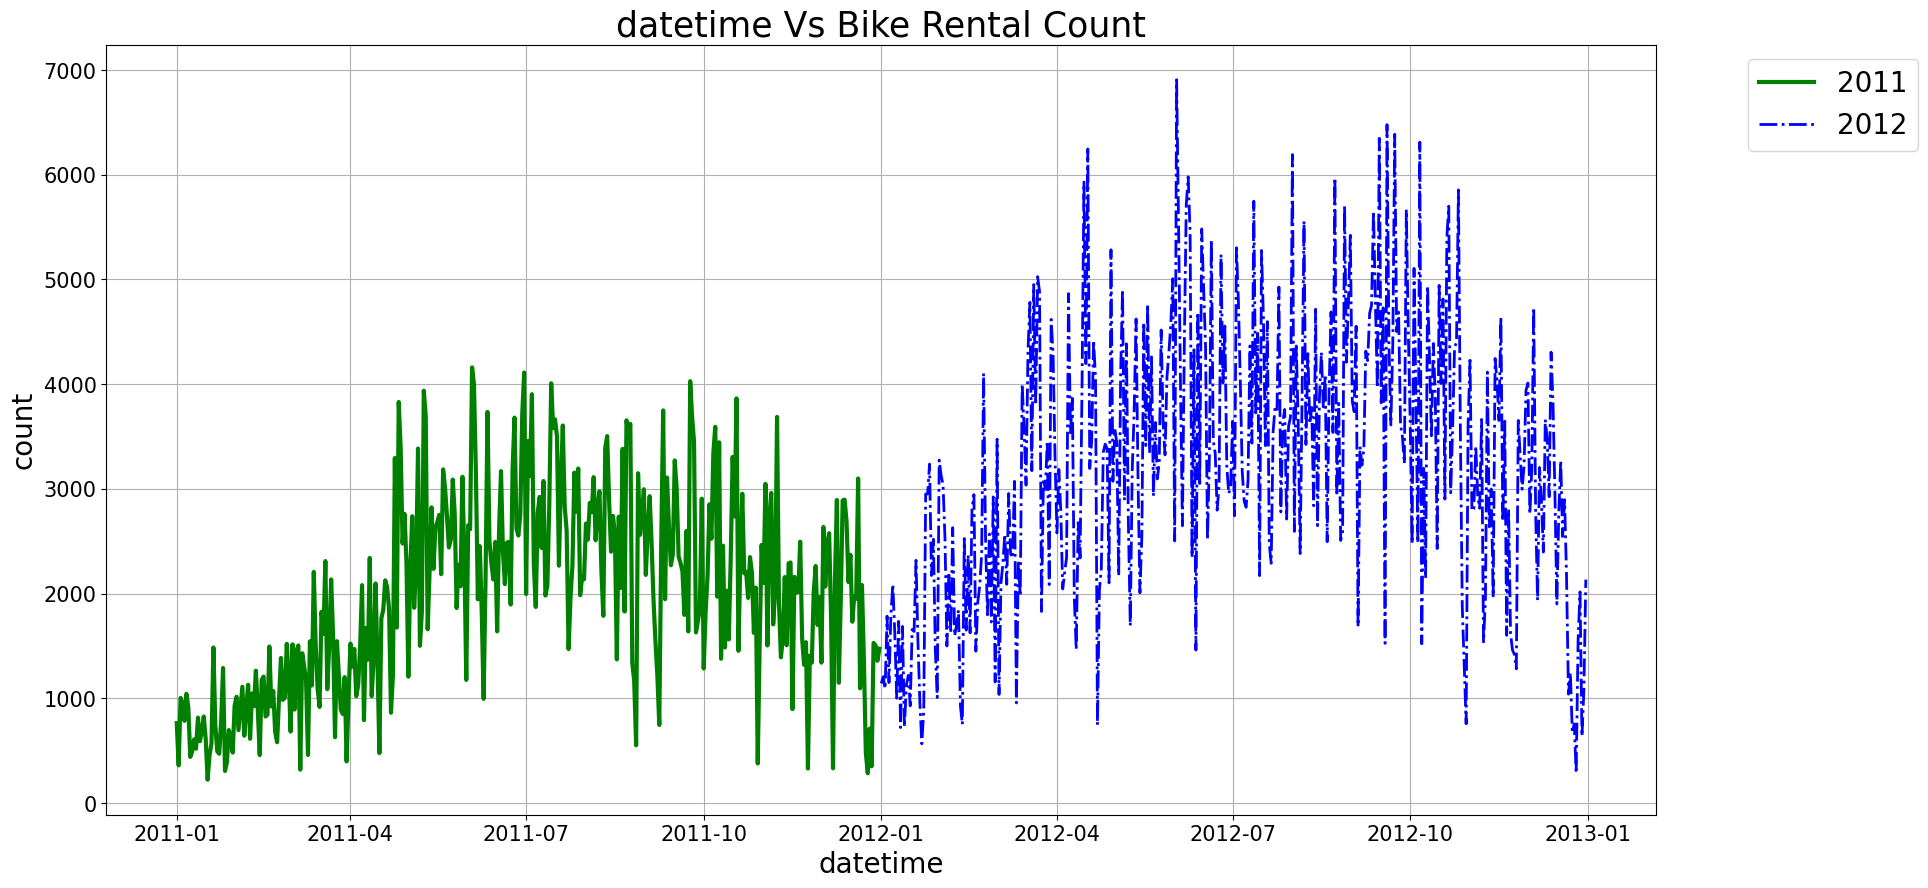

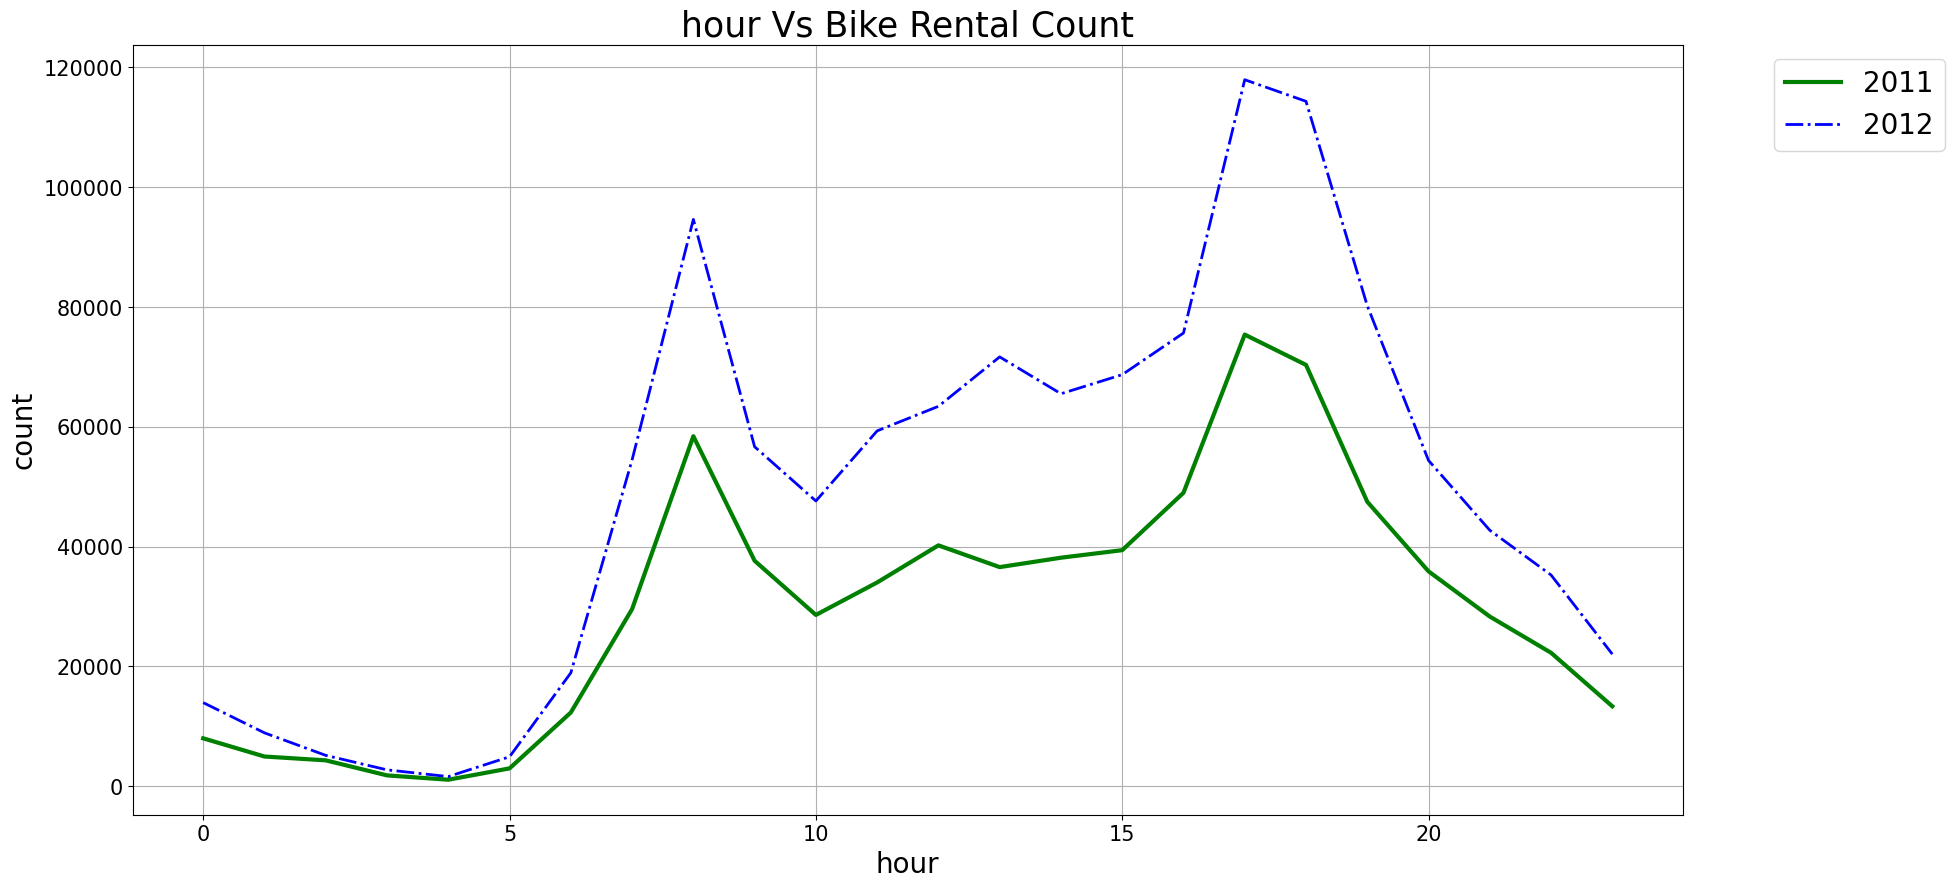

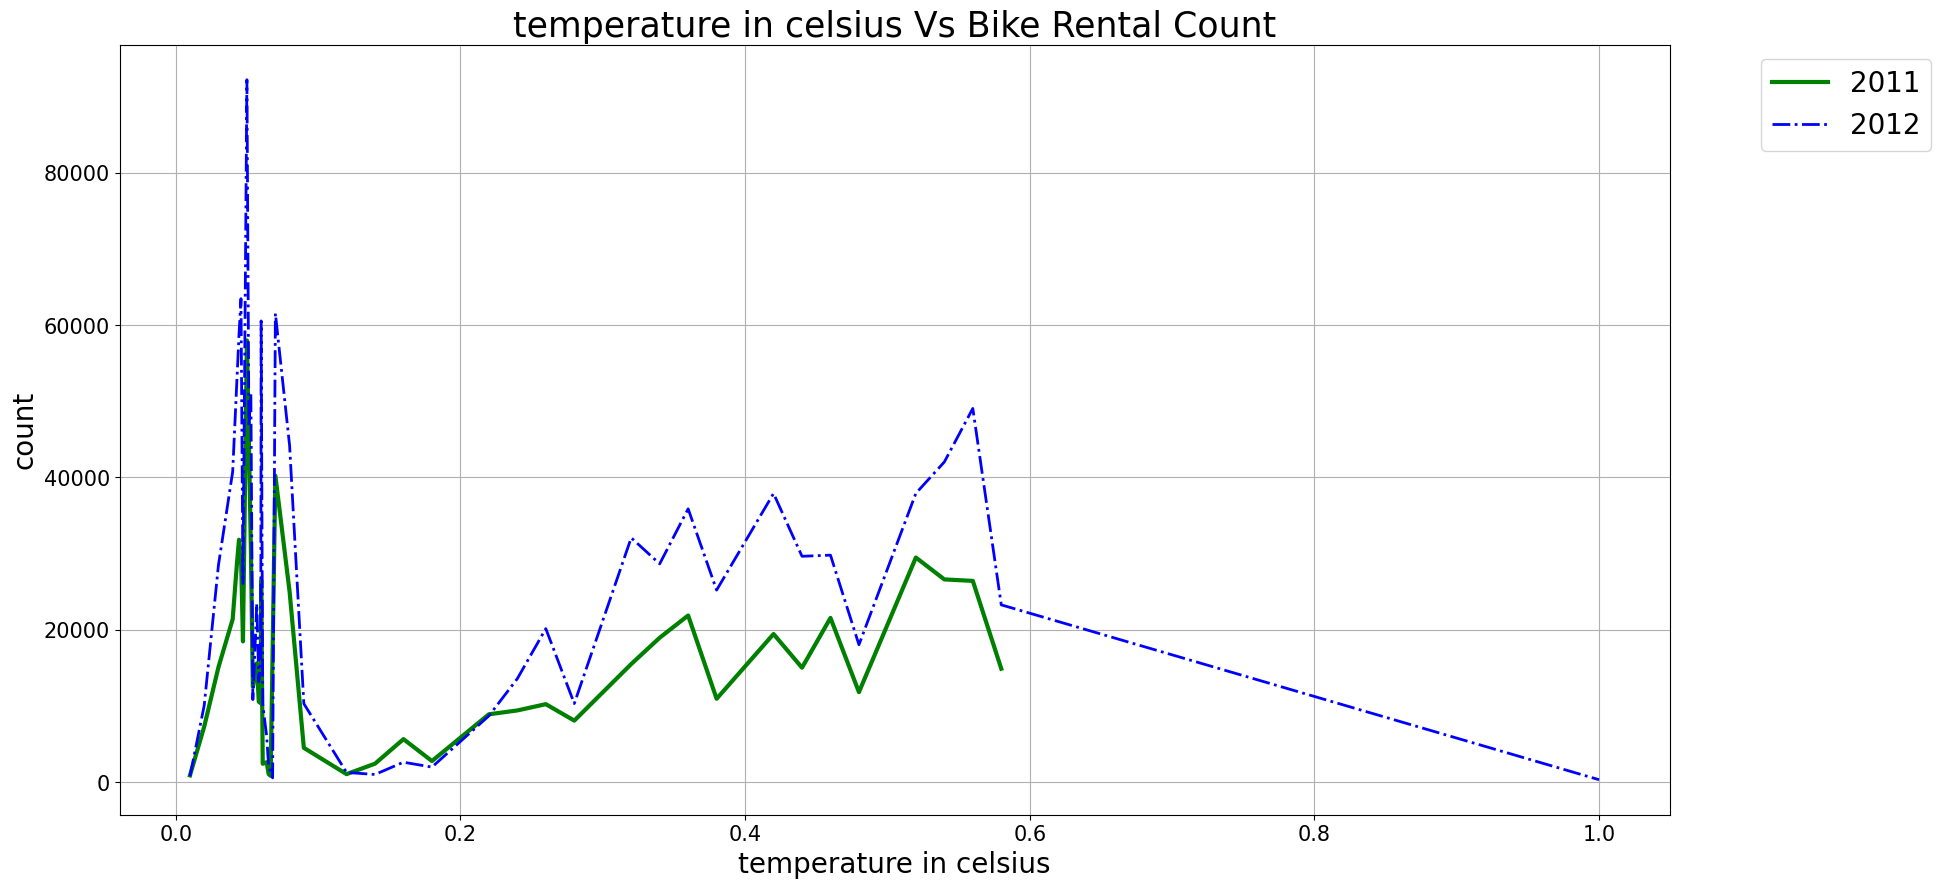

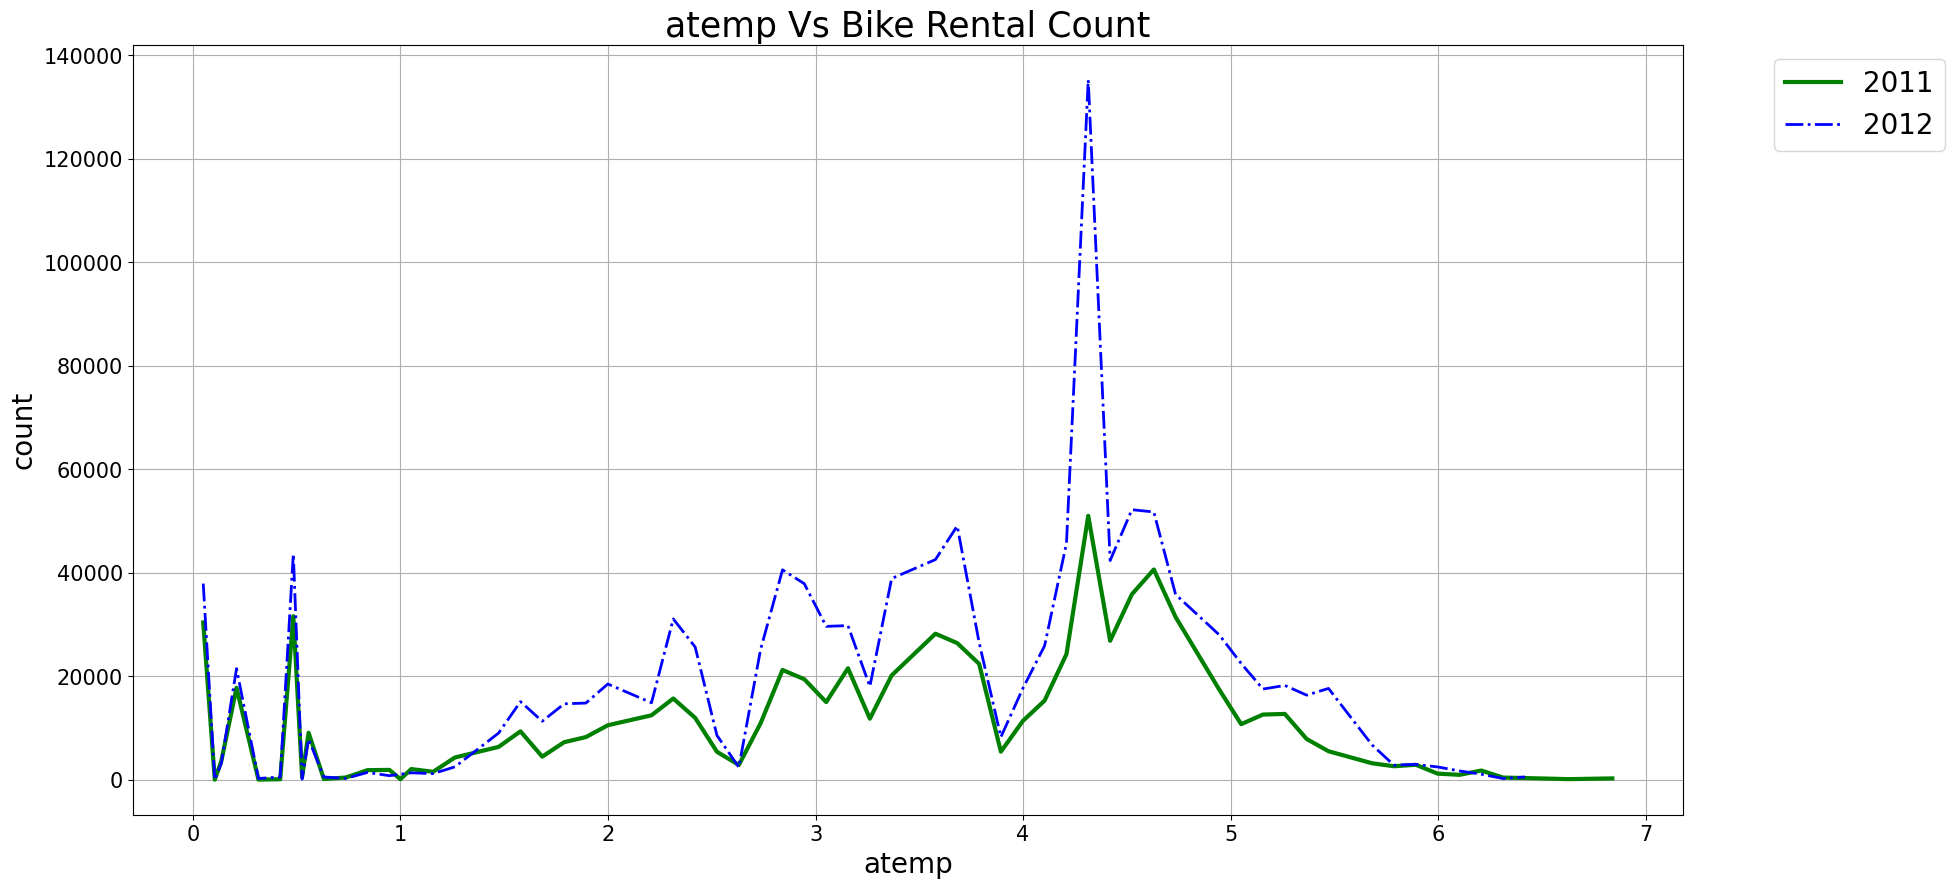

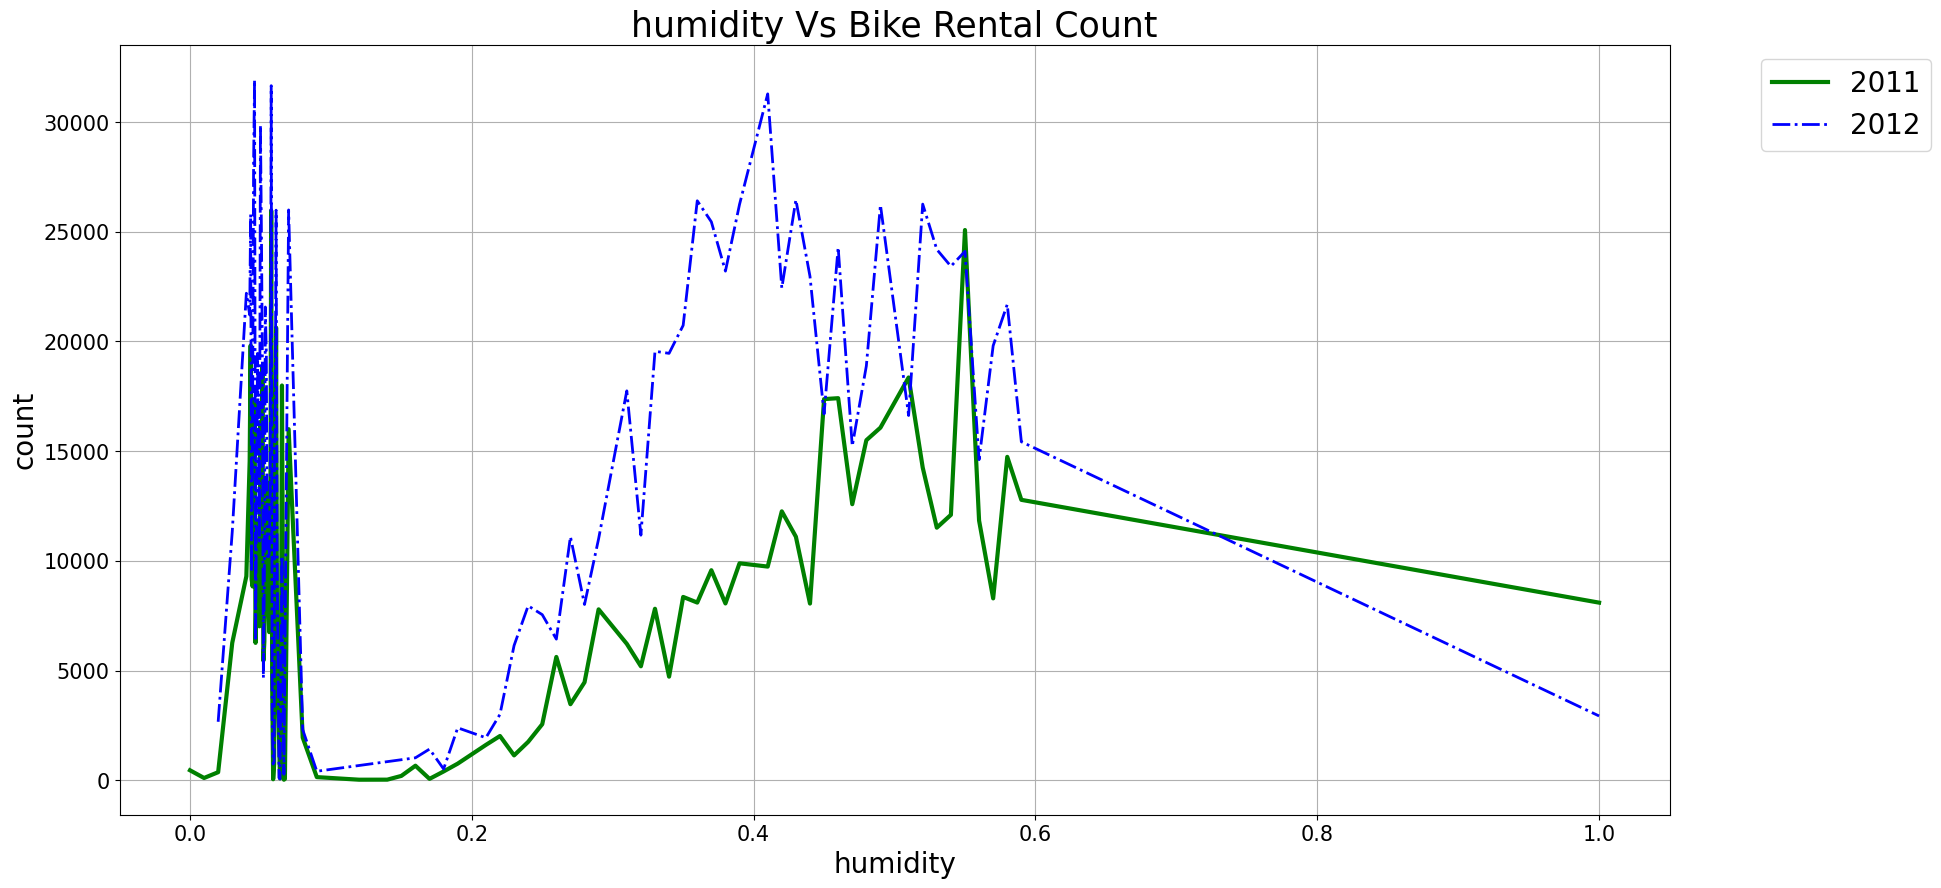

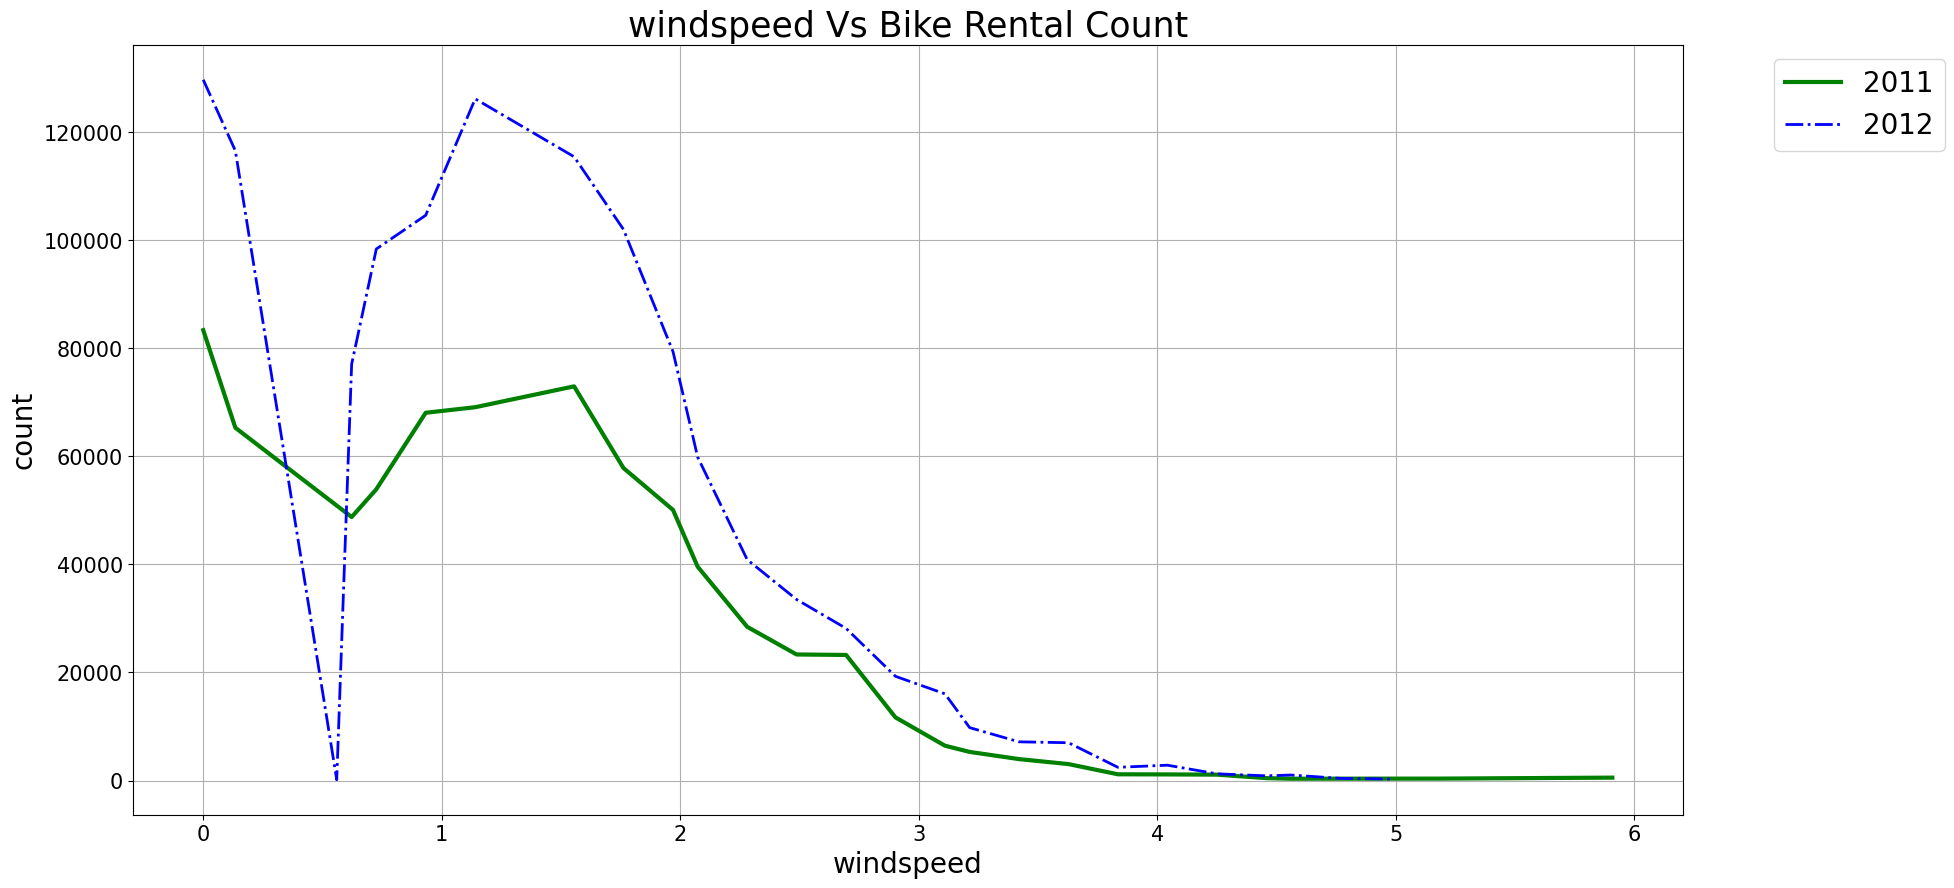

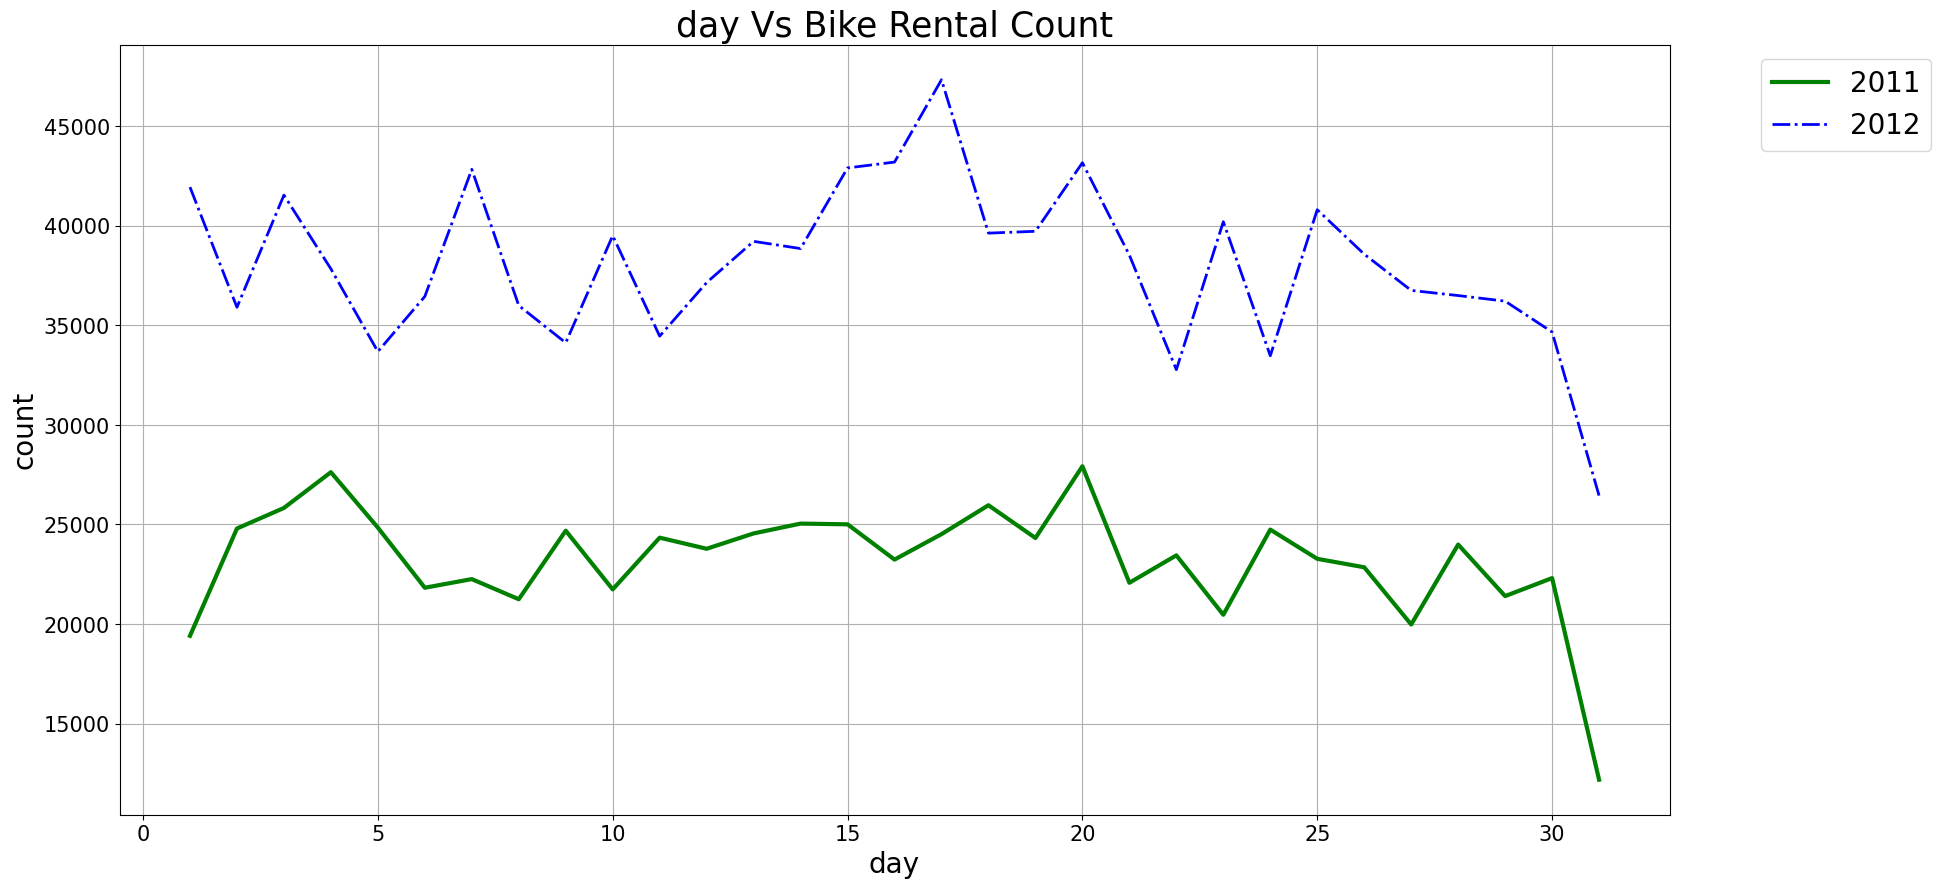

In [287]:
line_plot_continues_vs_target_for_two_dataframe(
    non_unique_variables, df_2011, df_2012, "count", "2011", "2012", "Vs Bike Rental Count")

## Bivariate and Multi variate analysis

In [288]:
def heatmap_for_two_category_with_target(var_list, data, target_column="Enter Target", title="", figsize=(10, 8)):
    for i in range(len(var_list)):
        print(
            f">>>>>>>>>>>>>>> {var_list[i]} vs other categorical Variables")
        for j in range(i+1, len(var_list)):
            plt.figure(figsize=figsize)
            plt.title(title + f" {var_list[i]} vs {var_list[j]}")
            df_filtered = (data.pivot_table(index=var_list[i], columns=var_list[j], values=target_column,
                                            aggfunc='sum'))/sum(df[target_column])
            sns.heatmap(df_filtered, annot=True, fmt=".2%",
                        cmap="Blues", annot_kws={'color': 'black'})
            plt.show()

>>>>>>>>>>>>>>> season vs other categorical Variables


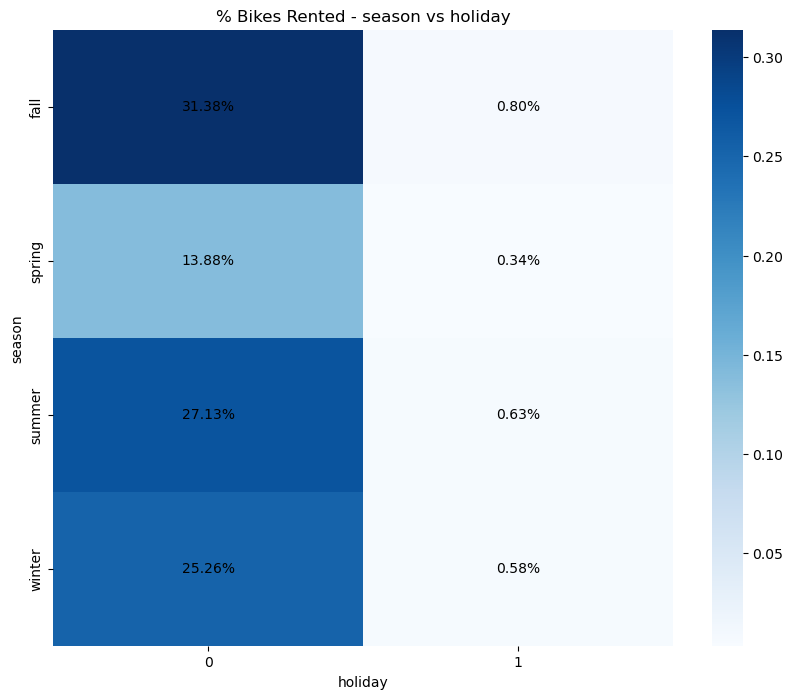

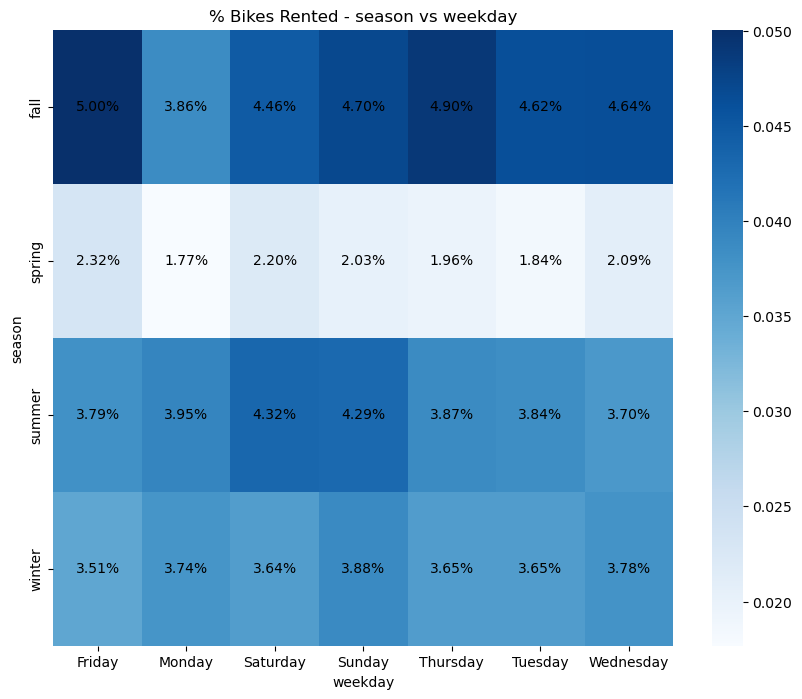

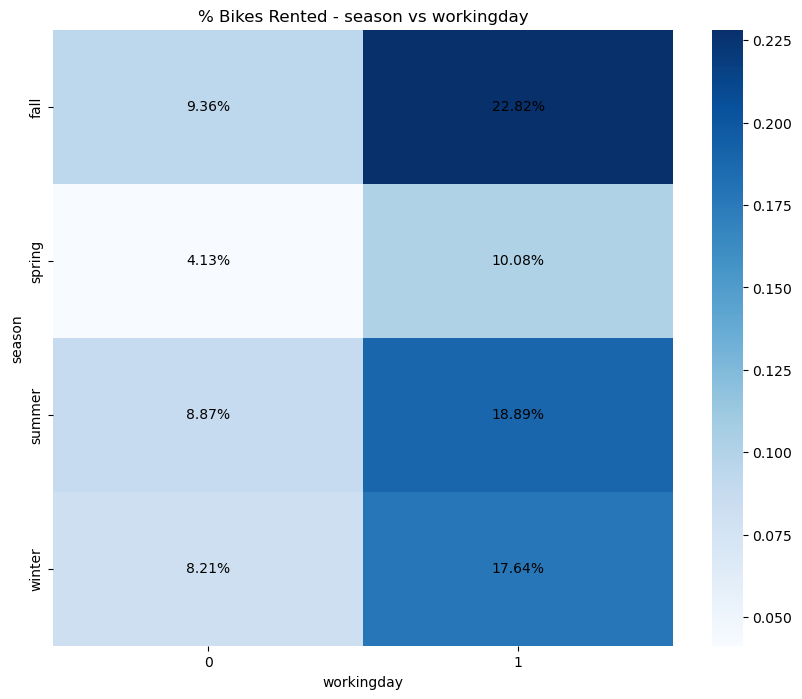

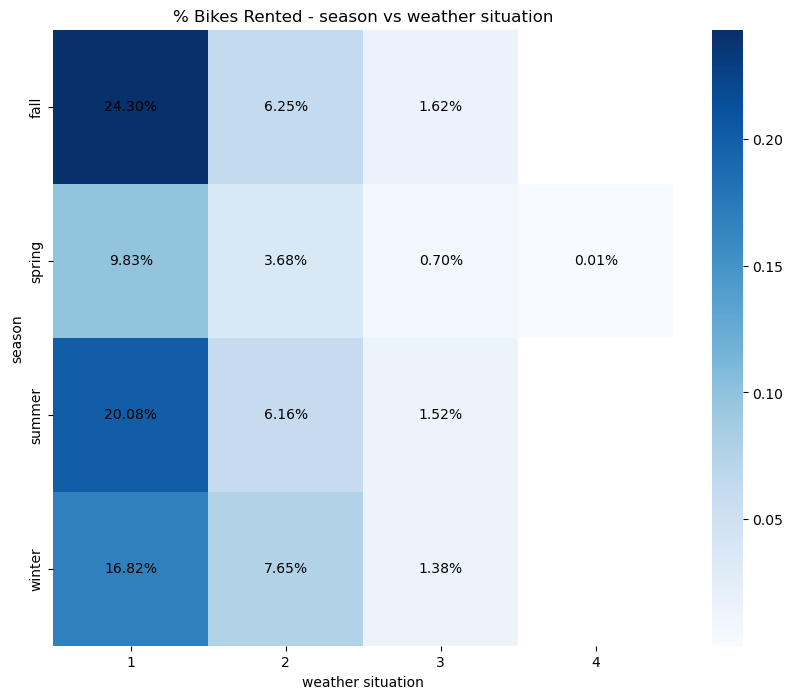

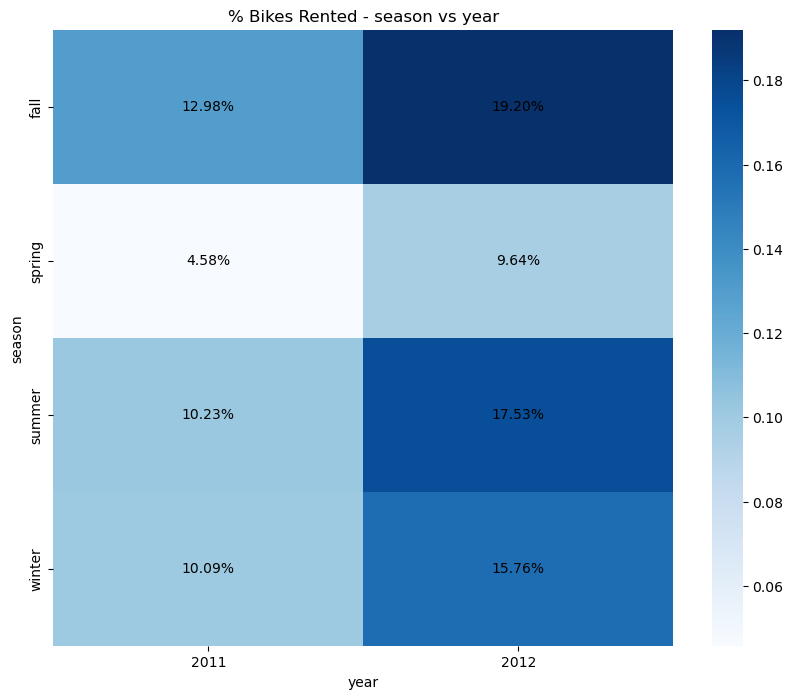

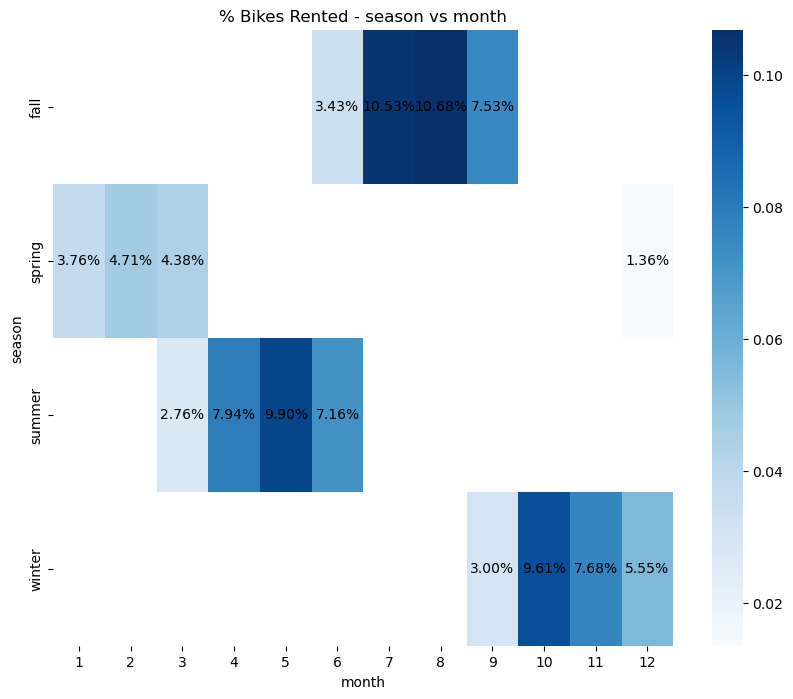

>>>>>>>>>>>>>>> holiday vs other categorical Variables


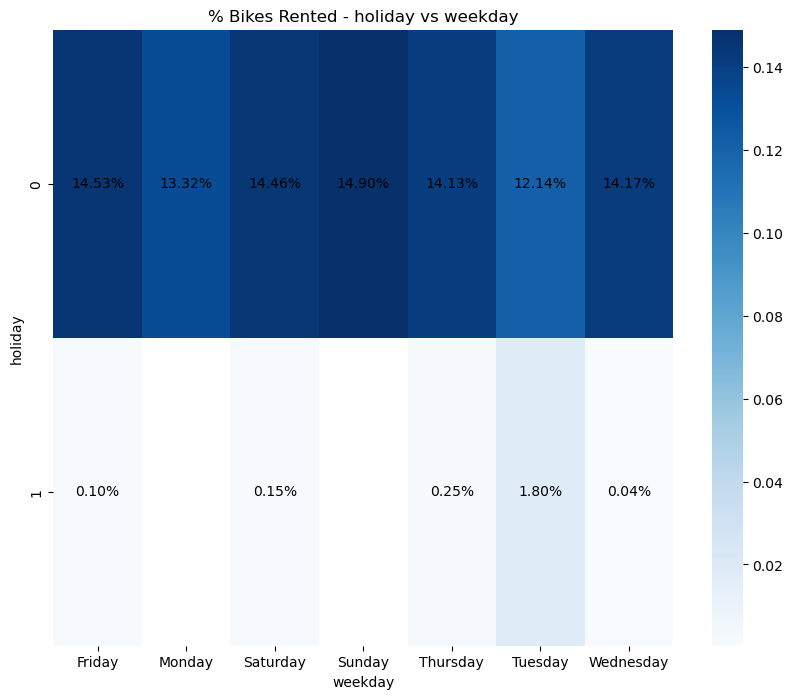

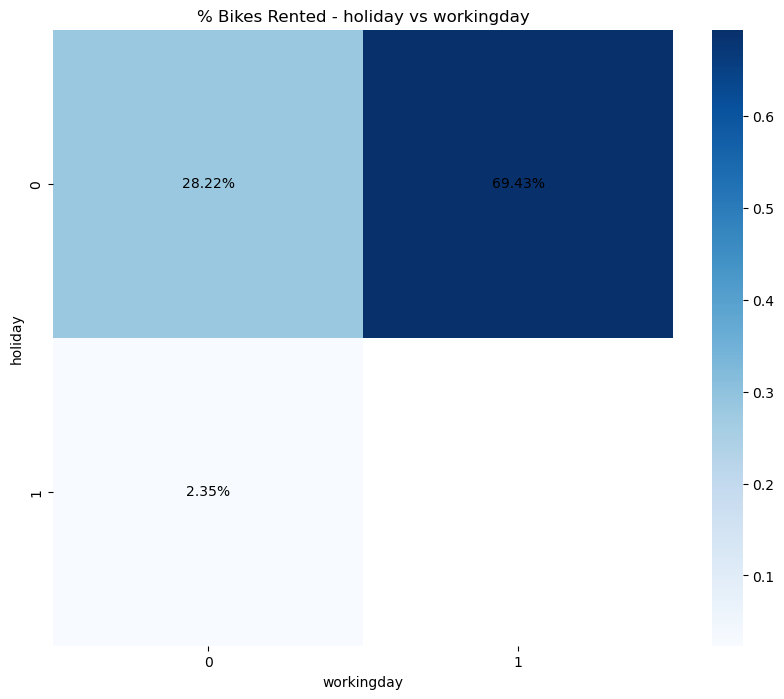

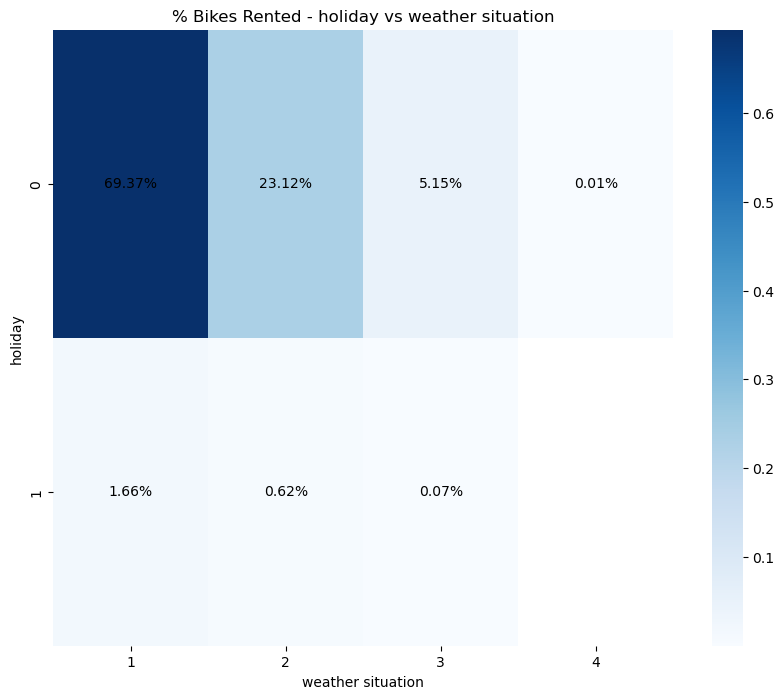

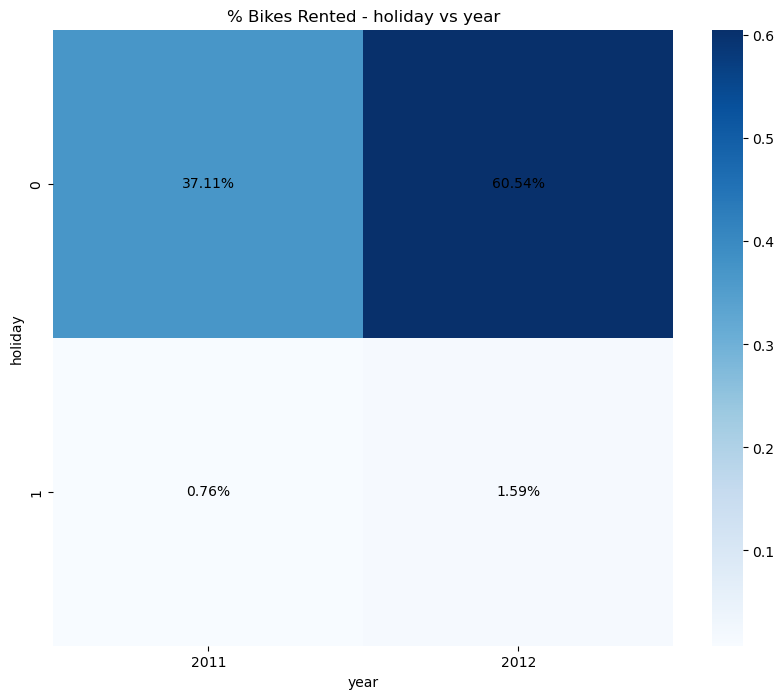

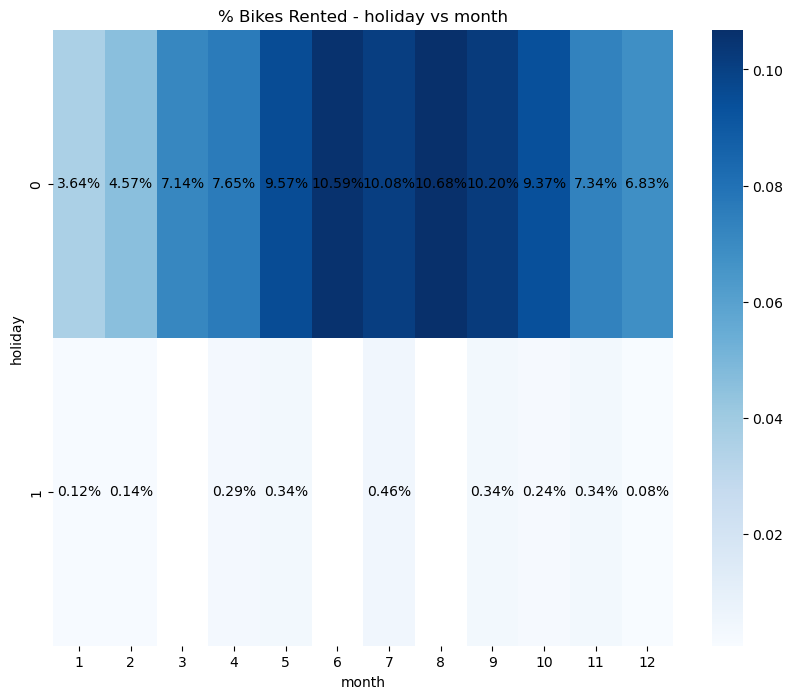

>>>>>>>>>>>>>>> weekday vs other categorical Variables


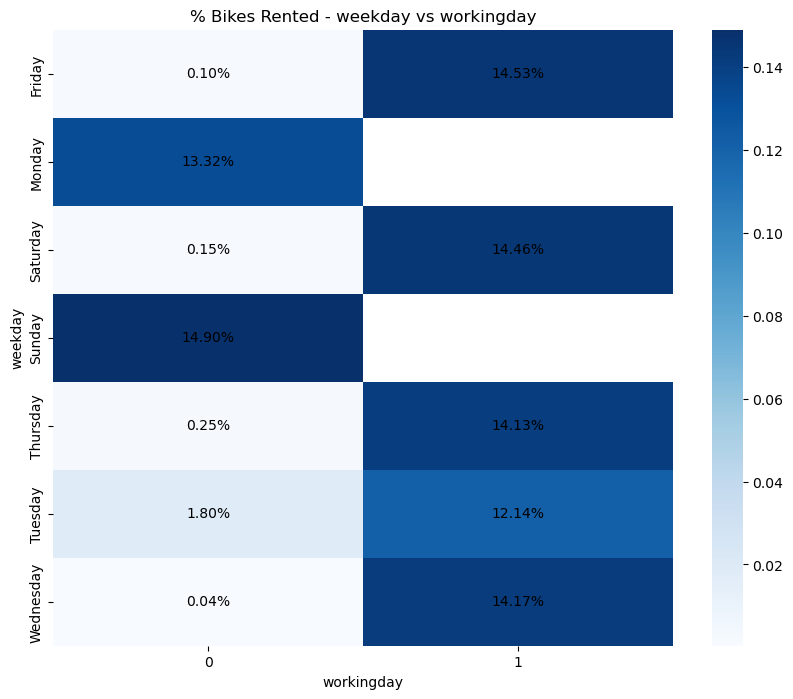

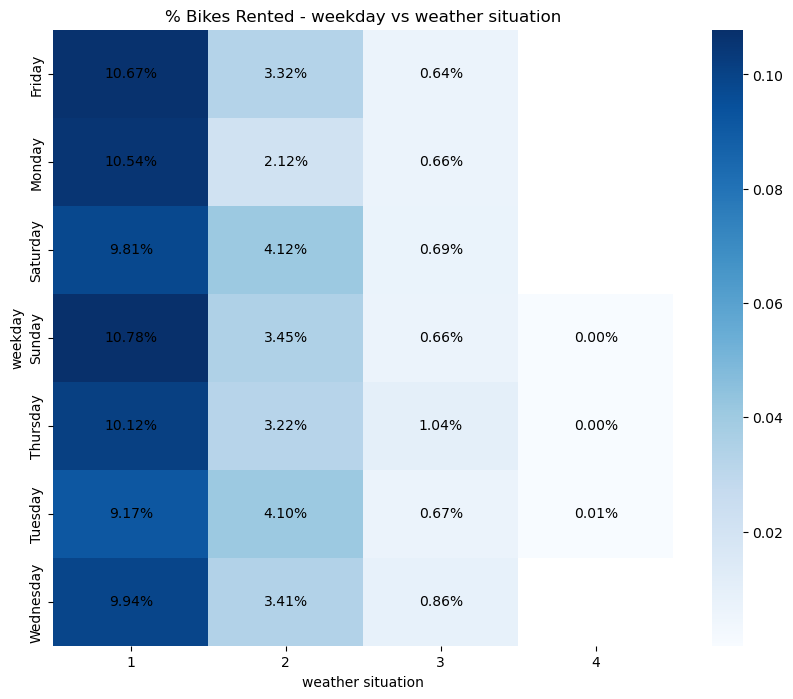

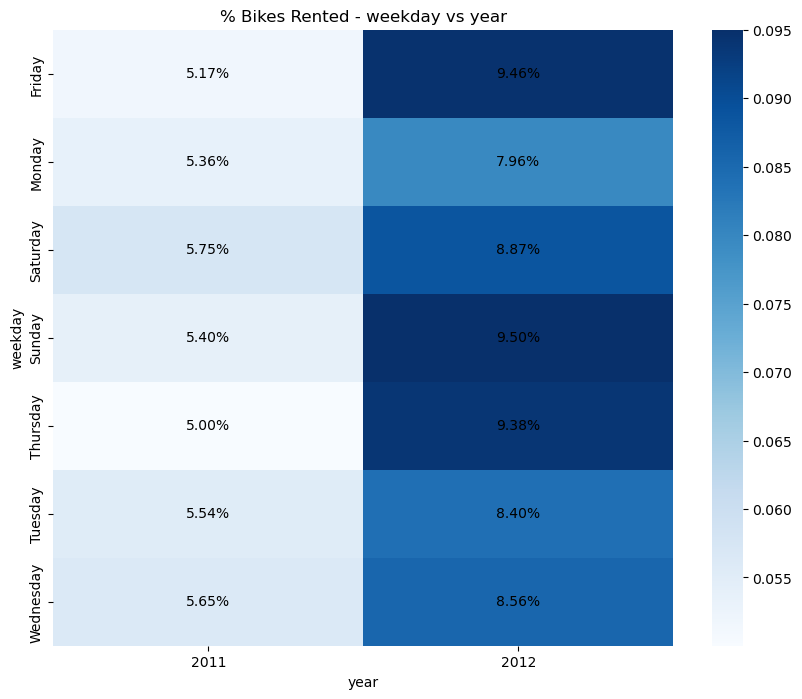

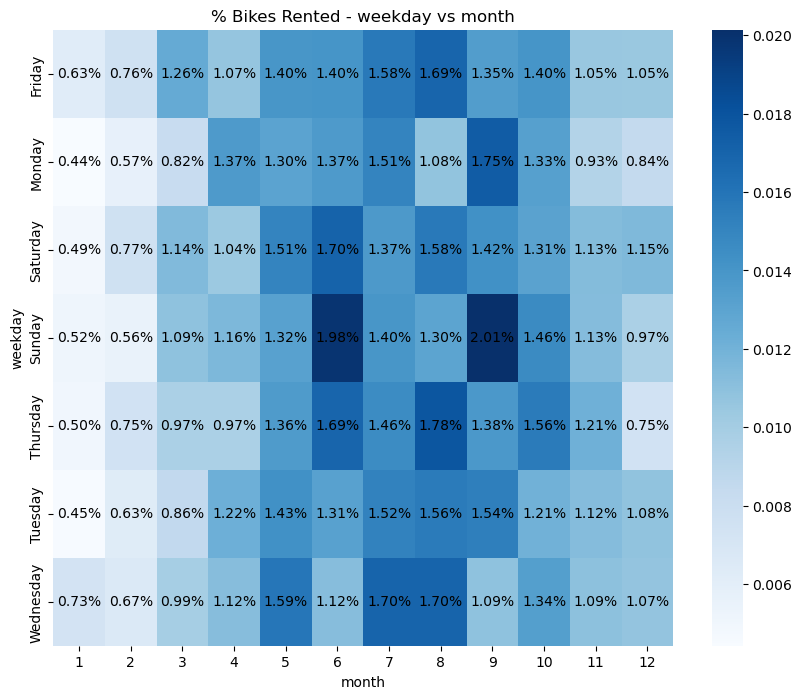

>>>>>>>>>>>>>>> workingday vs other categorical Variables


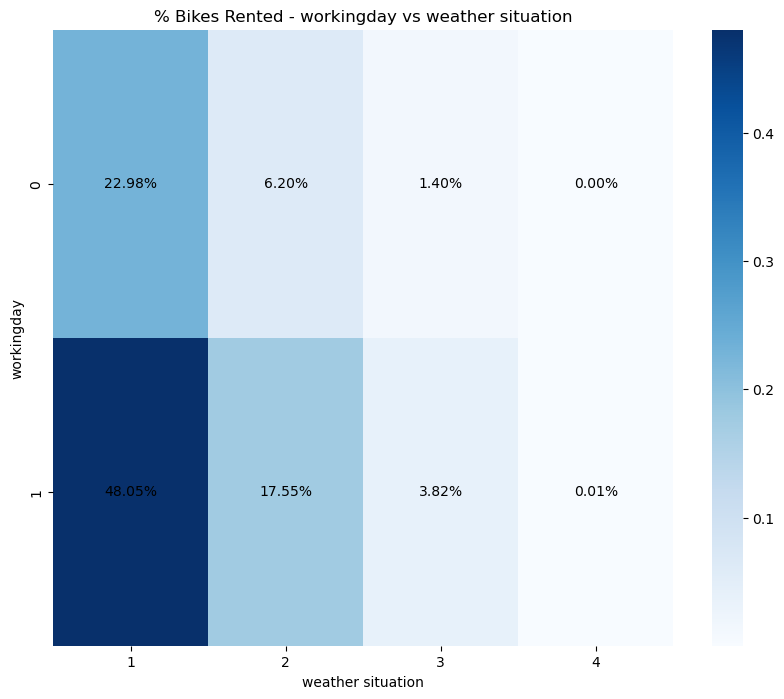

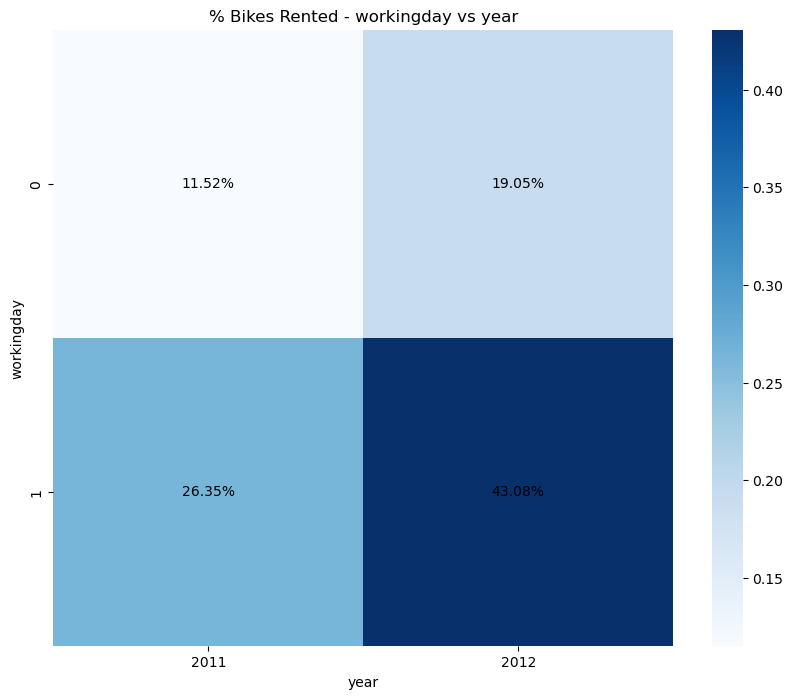

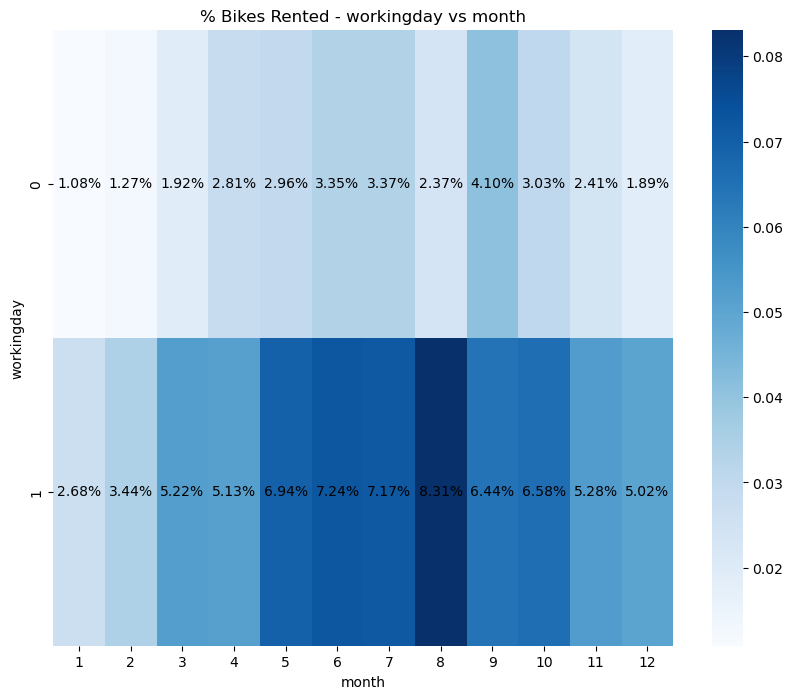

>>>>>>>>>>>>>>> weather situation vs other categorical Variables


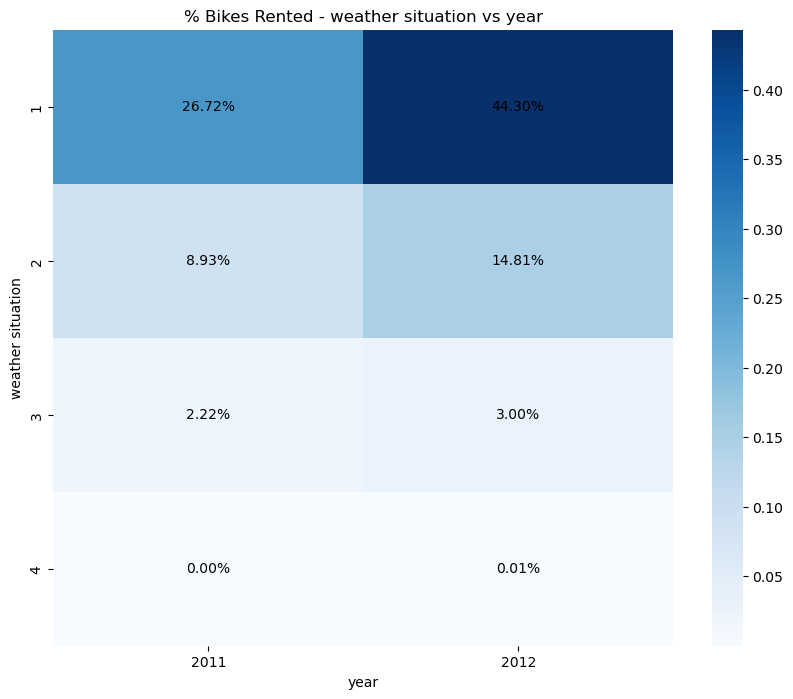

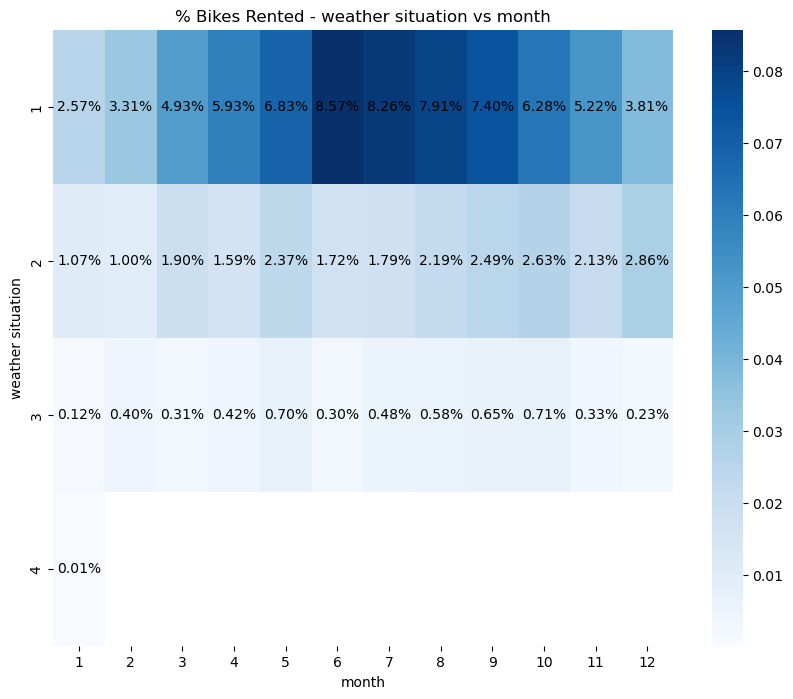

>>>>>>>>>>>>>>> year vs other categorical Variables


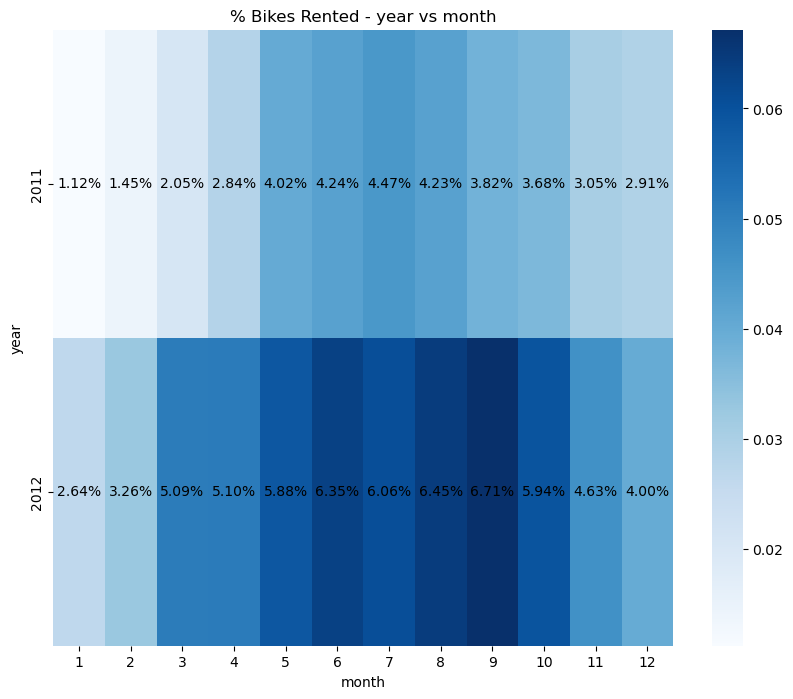

>>>>>>>>>>>>>>> month vs other categorical Variables


In [289]:
heatmap_for_two_category_with_target(
    unique_var_list, df_eda, target_column="count", title=r"% Bikes Rented -")

### Correlation plots

/tmp/ipykernel_6670/26207714.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["count"].sort_values(ascending=False)[1:].plot(kind='bar')


Text(0.5, 1.0, 'Correlation between Rented Bike Count vs other variables')

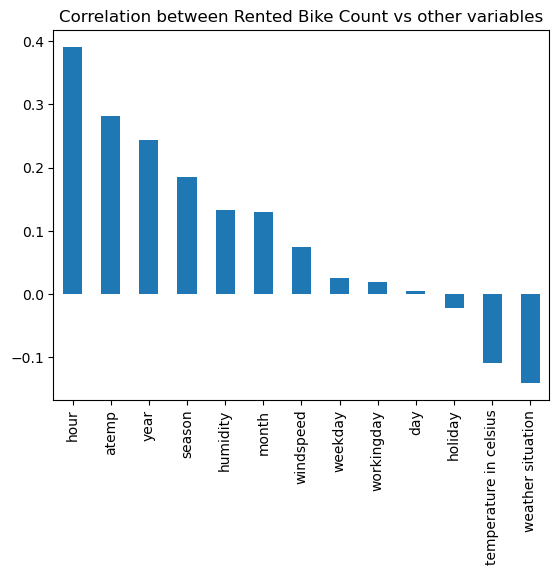

In [290]:
df.corr()["count"].sort_values(ascending=False)[1:].plot(kind='bar')
plt.title("Correlation between Rented Bike Count vs other variables")

/tmp/ipykernel_6670/904280028.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


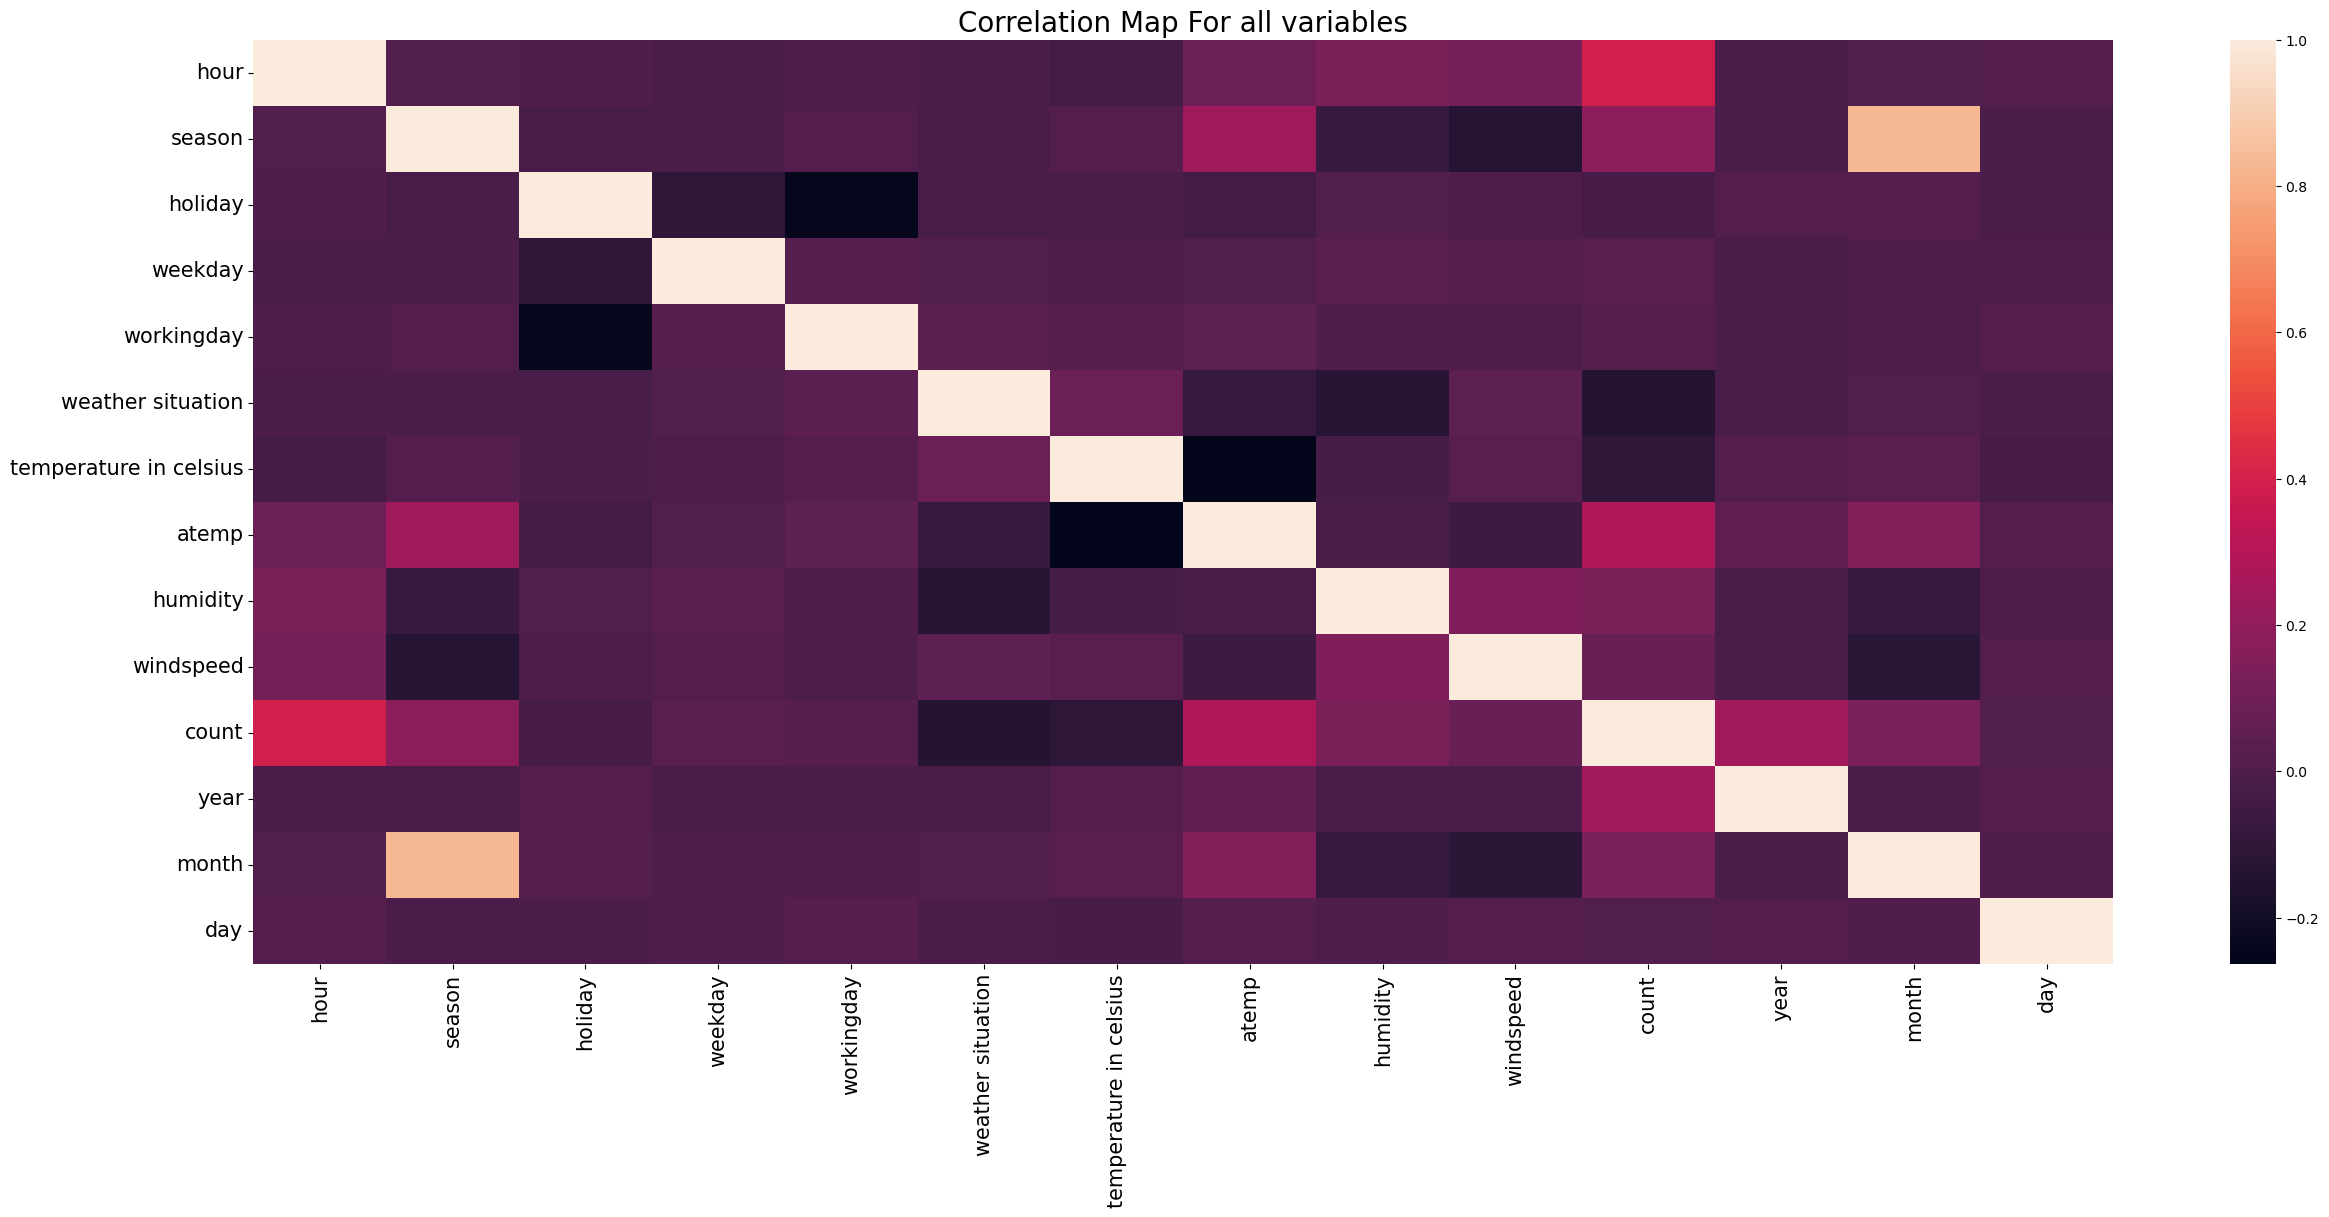

In [291]:

plt.figure(figsize=(30, 12))
sns.heatmap(df.corr())
plt.title("Correlation Map For all variables", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [292]:
df.to_csv("preprocessed_df.csv")

By [Muhlis cm](https://www.linkedin.com/in/muhliscm/)